# Final Machine Learning Project

## Introduction
**Members**:
- **Huynh Quoc Truong**: *52101007*
- **Dang Thi Minh Thu**: *52100843*
- **Dinh Hoang Phuc**: *52100290*

## Problem Statement
Mục tiêu chính của đề tài: Student Grade Prediction
- Dự đoán điểm thi cuối kỳ của sinh viên dựa trên các thông tin của sinh viên đó.

## Implementation
- **Dataset**: [Student Performance Data Set](/data/student-mat.csv)
**Dataset Information**: Bộ dữ liệu được cung cấp dựa trên thành tiếp học tập của các học sinh trung học ở Bồ Đào Nha. Bộ dữ liệu này có 33 thuộc tính. Các thuộc tính đầu vào bao gồm các thông tin về học sinh như tuổi, giới tính, trường học, địa chỉ, gia đình, các thông tin về thời gian học, các thông tin về các môn học, các thông tin về các kỳ thi trước đó, các thông tin về các hoạt động ngoại khóa, các thông tin về sức khỏe, thói quen học tập, kỳ thi cuối kỳ. Các thuộc tính đầu ra là điểm thi cuối kỳ của sinh viên.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
#Keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

#matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
# Load dataset
data = pd.read_csv("data/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [5]:
# Show information of dataset
print(f"Length of dataset: {len(data)}")
print(f"Shape of dataset: {data.shape}")
print(f"Columns of dataset: {data.columns}")

Length of dataset: 395
Shape of dataset: (395, 33)
Columns of dataset: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


### Feature Description
- **school** : student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).
- **sex**: student's sex (binary: 'F' - female or 'M' - male).
- **age**: student's age (numeric: from 15 to 22).
- **address**: student's home address type (binary: 'U' - urban or 'R' - rural).
- **famsize**: family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3).
- **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart).
- **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education).
- **Fedu**: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education).
- **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other').
- **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other').
- **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other').
- **guardian**: student's guardian (nominal: 'mother', 'father' or 'other').
- **traveltime**:  home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour).
- **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours).
- **failures**: number of past class failures (numeric: n if 0 <= n < 3, else 3).
- **schoolsup**: extra educational support (binary: yes or no).
- **famsup**: family educational support (binary: yes or no).
- **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no).
- **activities**: extra-curricular activities (binary: yes or no).
- **nursery**: attended nursery school (binary: yes or no).
- **higher**: wants to take higher education (binary: yes or no).
- **internet**: Internet access at home (binary: yes or no).
- **romantic**: with a romantic relationship (binary: yes or no).
- **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent).
- **freetime**: free time after school (numeric: from 1 - very low to 5 - very high).
- **goout**: going out with friends (numeric: from 1 - very low to 5 - very high).
- **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high).
- **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high).
- **health**: current health status (numeric: from 1 - very bad to 5 - very good).
- **absences**: number of school absences (numeric: from 0 to 93).

These grades are related with the course subject, Math or Portuguese:
- **G1**: first period grade (numeric: from 0 to 20).
- **G2**: second period grade (numeric: from 0 to 20).
- **G3**: final grade (numeric: from 0 to 20, output target).

In [6]:
# Show information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

Với dữ liệu trên, ta có thể thấy rằng:
- Dữ liệu có 395 dòng và 33 cột.
- Các cột dữ liệu bao gồm các loại khác nhau như: số, chuỗi,...
- Không có cột nào có giá trị null hoặc NaN.

In [8]:
# Show statistical information of dataset
# describe with numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [9]:
# describe with object data
data.describe(include='object').T

,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,395,2,U,307
famsize,395,2,GT3,281
Pstatus,395,2,T,354
Mjob,395,5,other,141
Fjob,395,5,other,217
reason,395,4,course,145
guardian,395,3,mother,273
schoolsup,395,2,no,344


Từ những dữ liệu được miêu tả bên trên, ta có thể thấy rằng:
- Trung bình các học sinh nằm trong lứa tuổi từ 16 đến 18 tuổi.
- Thời gian học của các học sinh trung bình là 2 đến 5 giờ mỗi tuần.
- Các học sinh có thói quen uống rượu vào cuối tuần.
- ...

In [10]:
# Numberical data
num_data = data.select_dtypes(include='number')
num_colums = num_data.columns
print(f"Numberical columns: {num_colums.tolist()}")
print(f"Number of numberical columns: {len(num_colums)}")
num_data.head()

Numberical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Number of numberical columns: 16


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [11]:
# Categorical data
cat_data = data.select_dtypes(include='object')
cat_colums = cat_data.columns
print(f"Categorical columns: {cat_colums.tolist()}")
print(f"Number of categorical columns: {len(cat_colums)}")
cat_data.head()

Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Number of categorical columns: 17


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


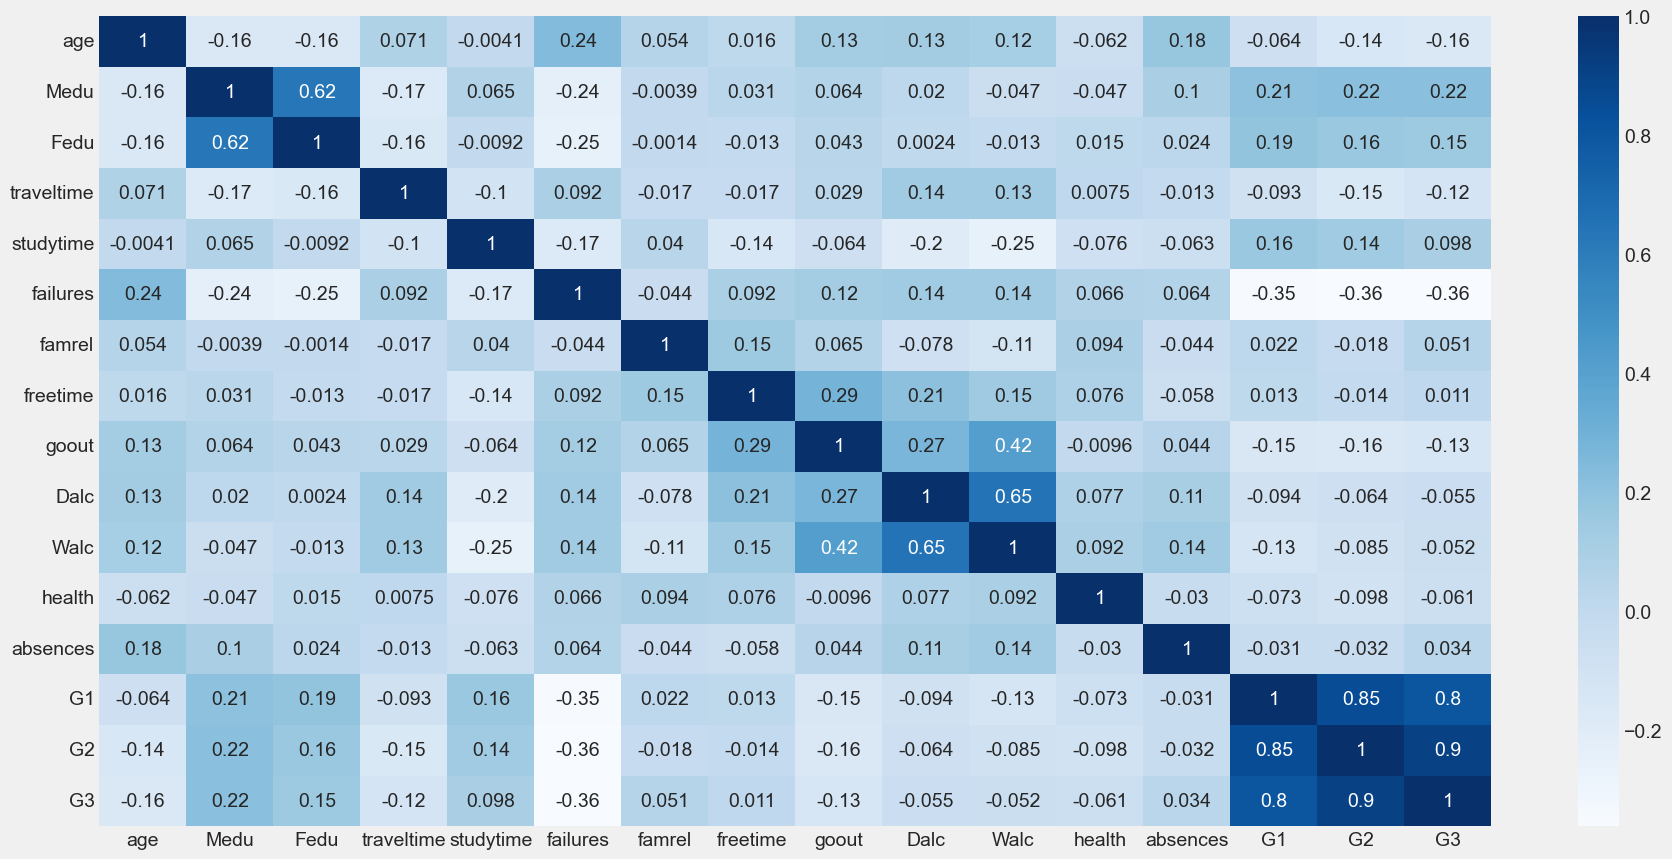

In [12]:
# Show correlation between numerical data
plt.figure(figsize=(20, 10))
sns.heatmap(num_data.corr(), annot=True, cmap='Blues')
plt.show()

In [13]:
num_data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


In [14]:
# The correlation with target
num_data.corr()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

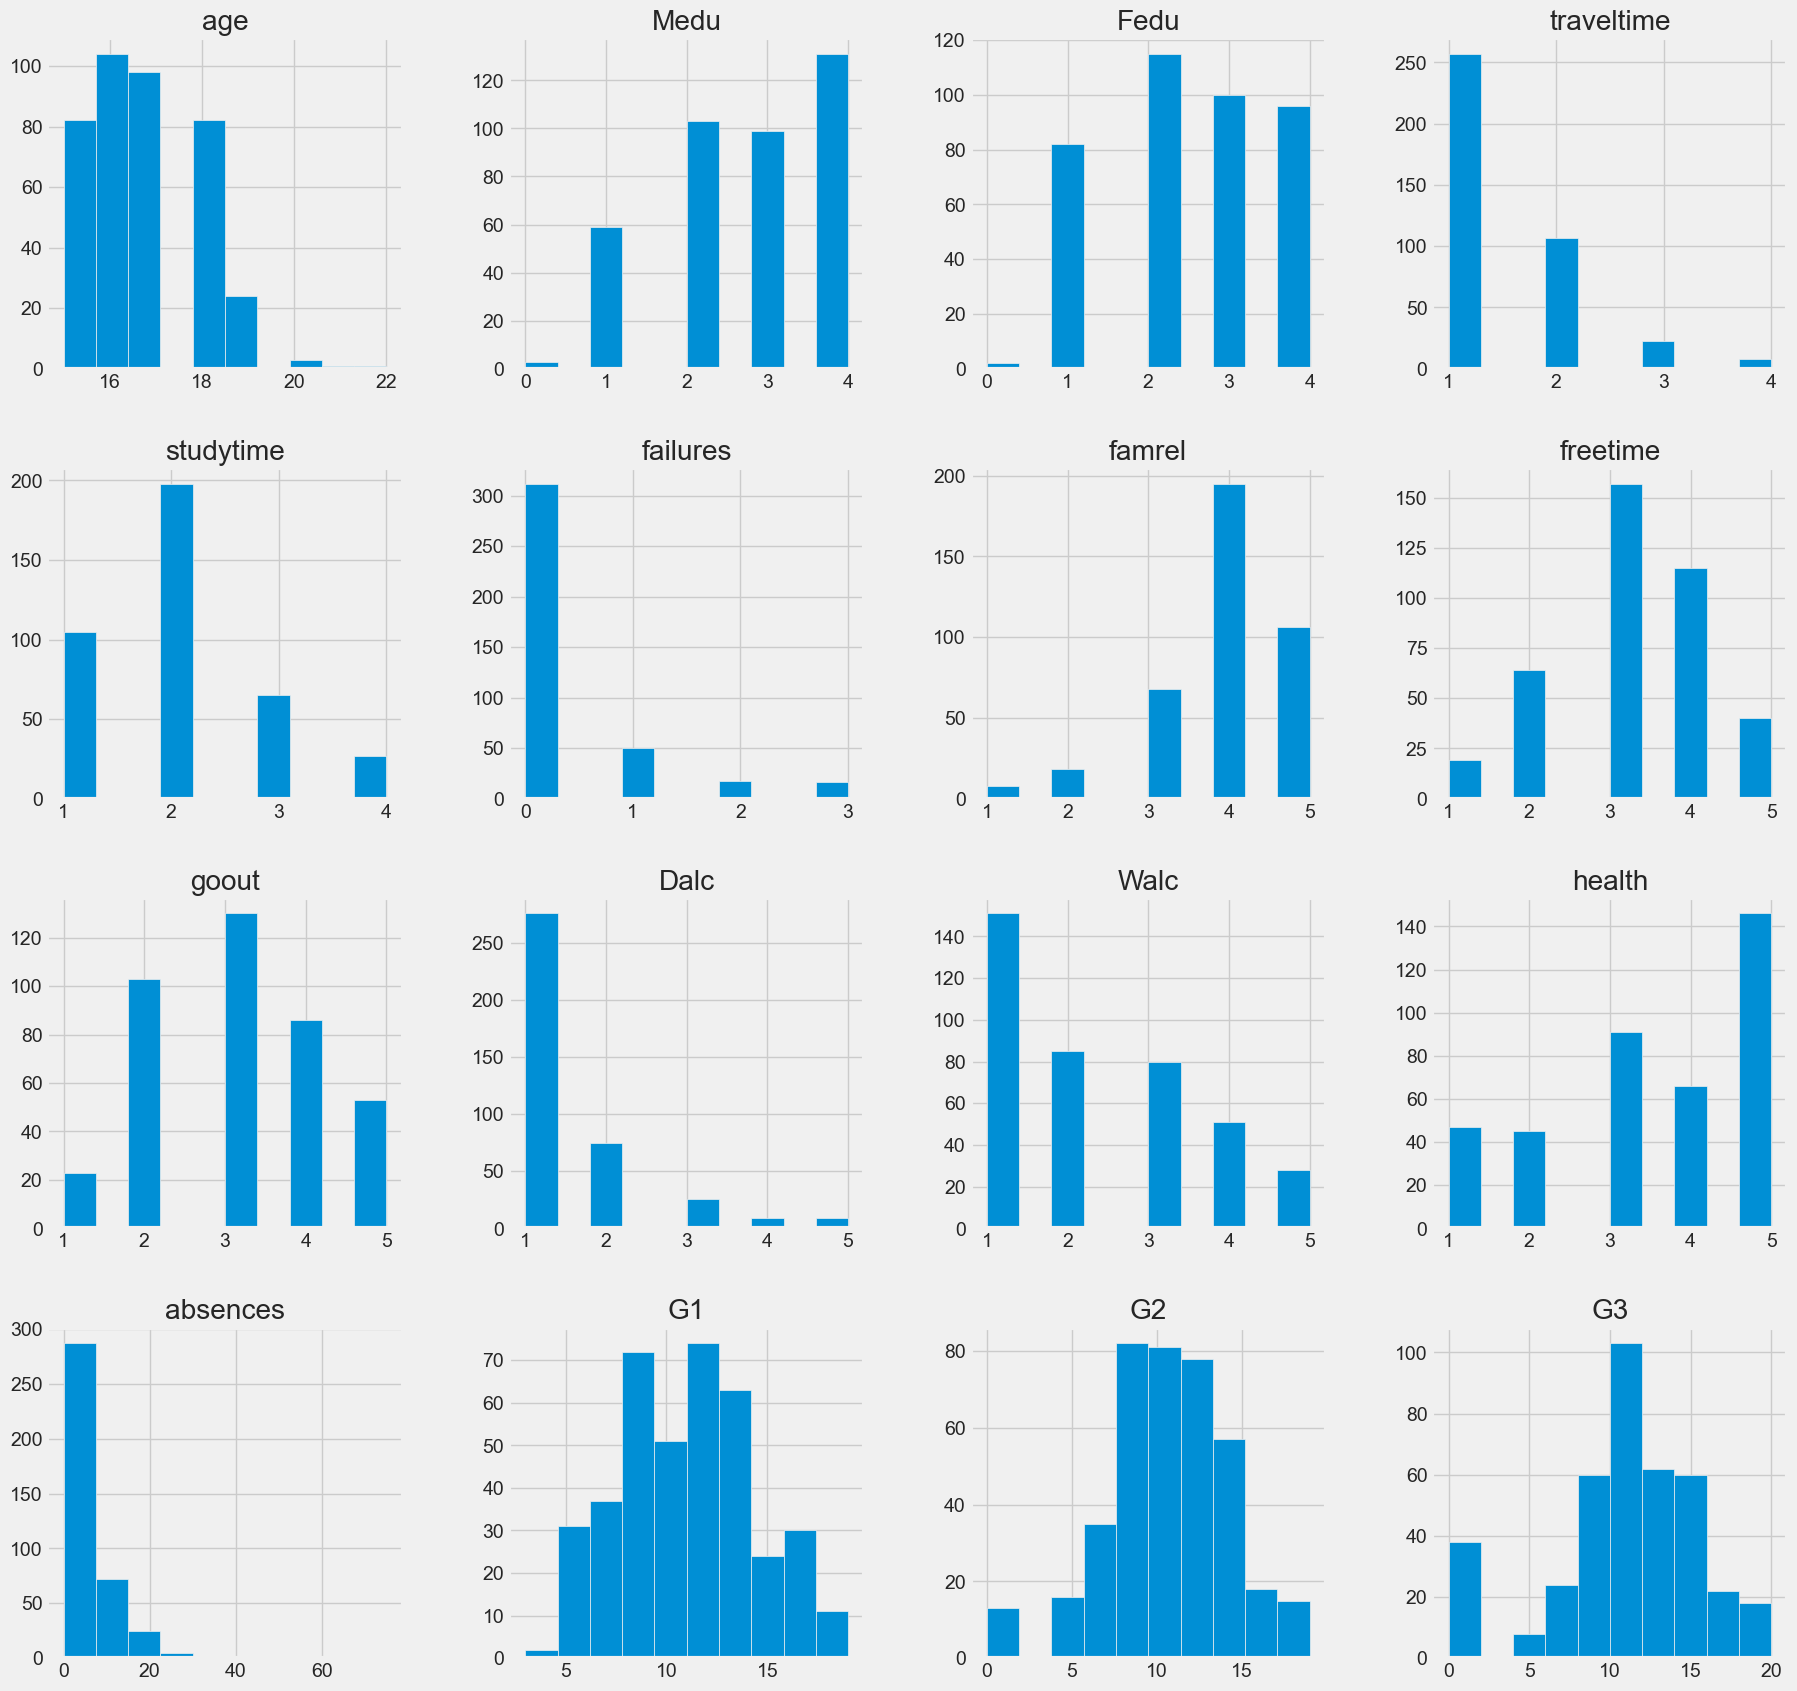

In [15]:
# Show distribution of numerical data
num_data.hist(figsize=(20, 20))
plt.show()

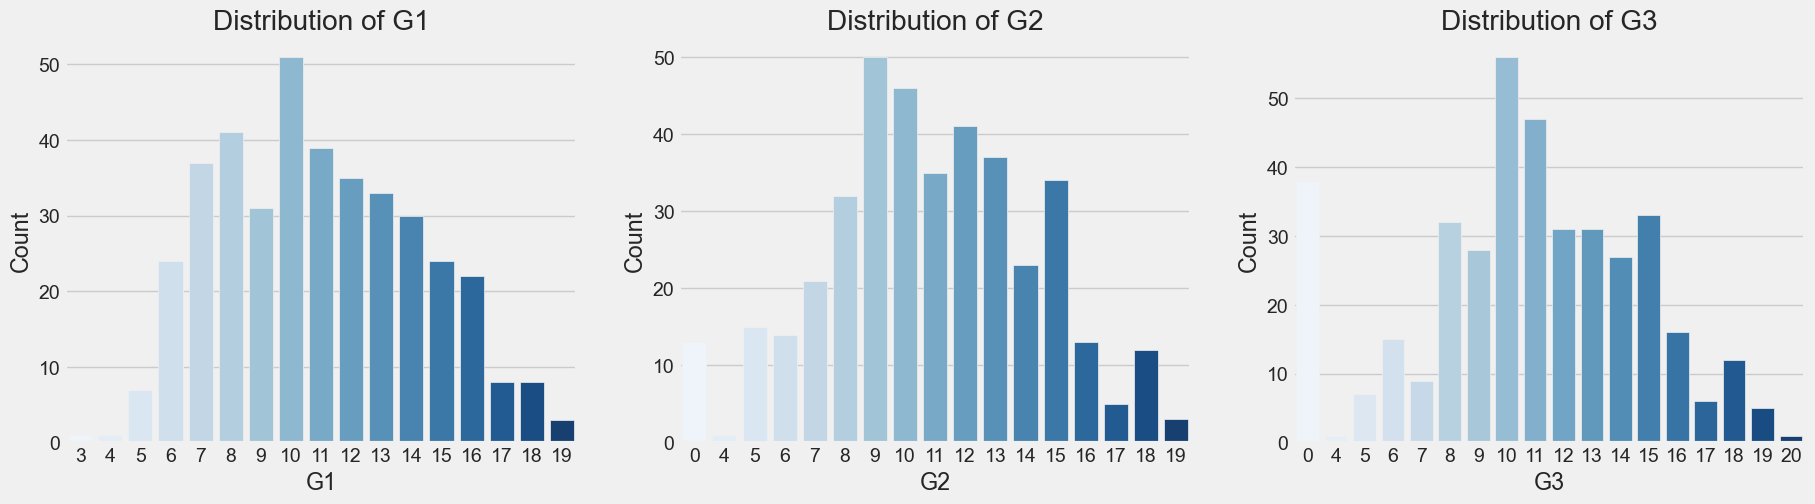

In [16]:
# Distribution of the grades
grades = ['G1', 'G2', 'G3']
grades_label = {'G1': 'First period grade', 'G2': 'Second period grade', 'G3': 'Final grade'}
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.countplot(data=data, x=grade, ax=ax, palette='Blues')
    ax.set_title(f"Distribution of {grade}")
    ax.set_xlabel(f"{grade}")
    ax.set_ylabel("Count")
plt.show()

Từ các biểu đồ trên, ta có thể chú ý đến một số features đáng chú ý như:
- Các học sinh có thói quen học tập nhiều hơn (studytime) thường có kết quả thi cuối kỳ cao hơn (G3).
- Số lần nghỉ học (absences) có mối tương quan với việc đi chơi với bạn bè (goout). Số lần nghỉ học càng nhiều thì kết quả thi cuối kỳ càng thấp.
- Điểm số của kỳ thi trước đó (G1, G2) có mối tương quan cao với kết quả thi cuối kỳ (G3).
- Các học sinh càng có nhiều lỗi vi phạm trong quá khứ (failures) thì kết quả thi cuối kỳ càng thấp.
- Hầu hết các học sinh đạt điểm cuối kì từ 10 đến 15 điểm.
- Đặc biệt, có một số học sinh đạt điểm cuối kì là 0 điểm. Có thể do các học sinh này không tham gia kỳ thi cuối kì hoặc không đủ điều kiện tham gia kỳ thi cuối kì.

In [17]:
high_corr_features = ['studytime', 'absences', 'G1', 'G2', 'failures', 'G3']

Từ các features ảnh hưởng cao đến mục tiêu (G3), ta có có thể phân tích sau vào thông qua một vài đặc điểm của chúng:

#### Failures có ảnh hưởng đến điểm số hay không và tác động như thế nào (nếu có)?

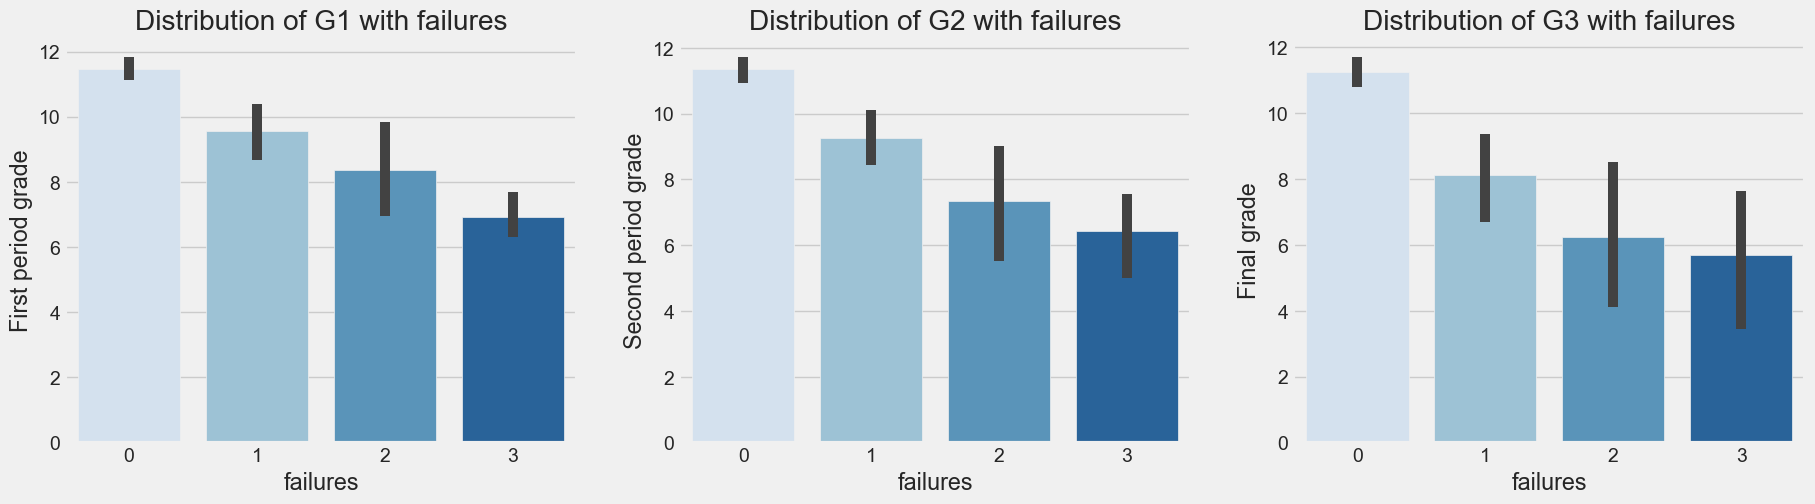

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='failures', y=grade, ax=ax, palette='Blues')
    ax.set_title(f"Distribution of {grade} with failures")
    ax.set_xlabel(f"failures")
    ax.set_ylabel(f"{grades_label[grade]}")
plt.show()

Từ biểu cột phân tích về số lần vi phạm trong quá khứ (failures) với điểm số của các kỳ thi, ta có thể thấy rằng:
- Các học sinh có số lần vi phạm trong quá khứ là 0 thì có kết quả thi cuối kì tốt hơn so với các học sinh có số lần vi phạm trong quá khứ là 1, 2, 3.
- Số lần vi phậm tỉ lệ thuận với kết quả thi cuối kì.

#### Absences có ảnh hưởng đến điểm số hay không và tác động như thế nào (nếu có)?

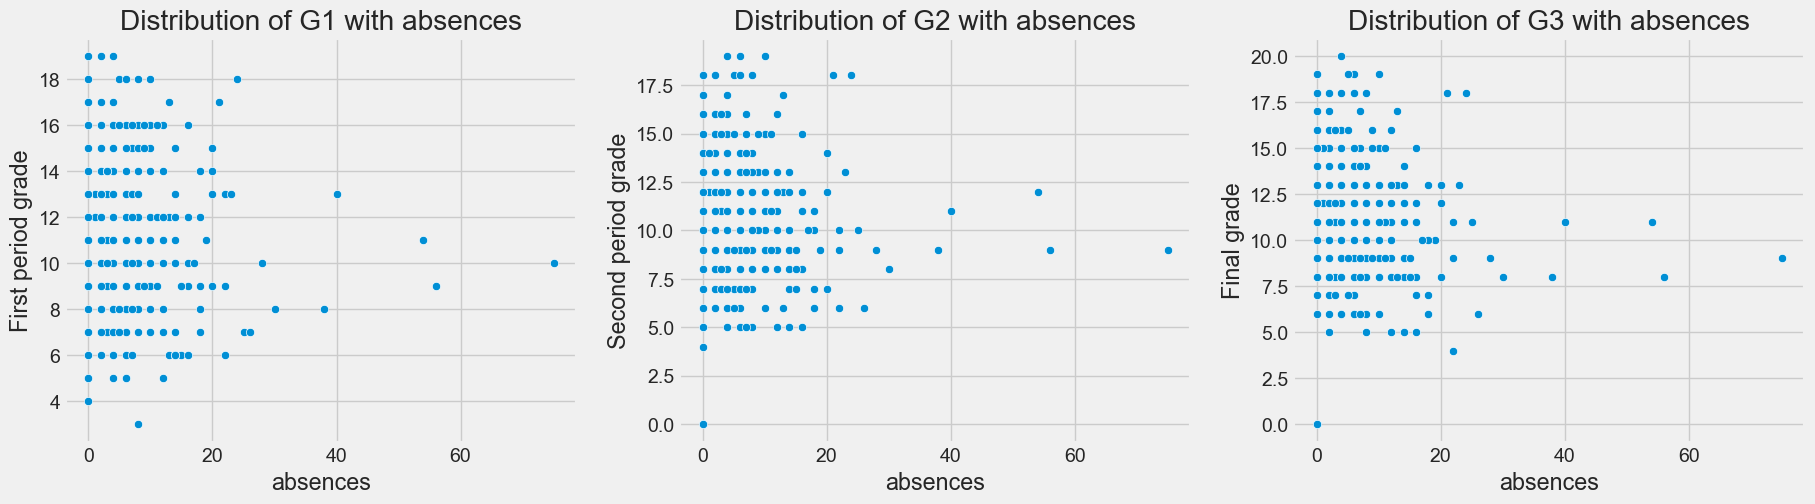

In [19]:
# Distribution of absences with G3
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.scatterplot(data=data, x='absences', y=grade, ax=ax)
    ax.set_title(f"Distribution of {grade} with absences")
    ax.set_xlabel(f"absences")
    ax.set_ylabel(f"{grades_label[grade]}")
plt.show()

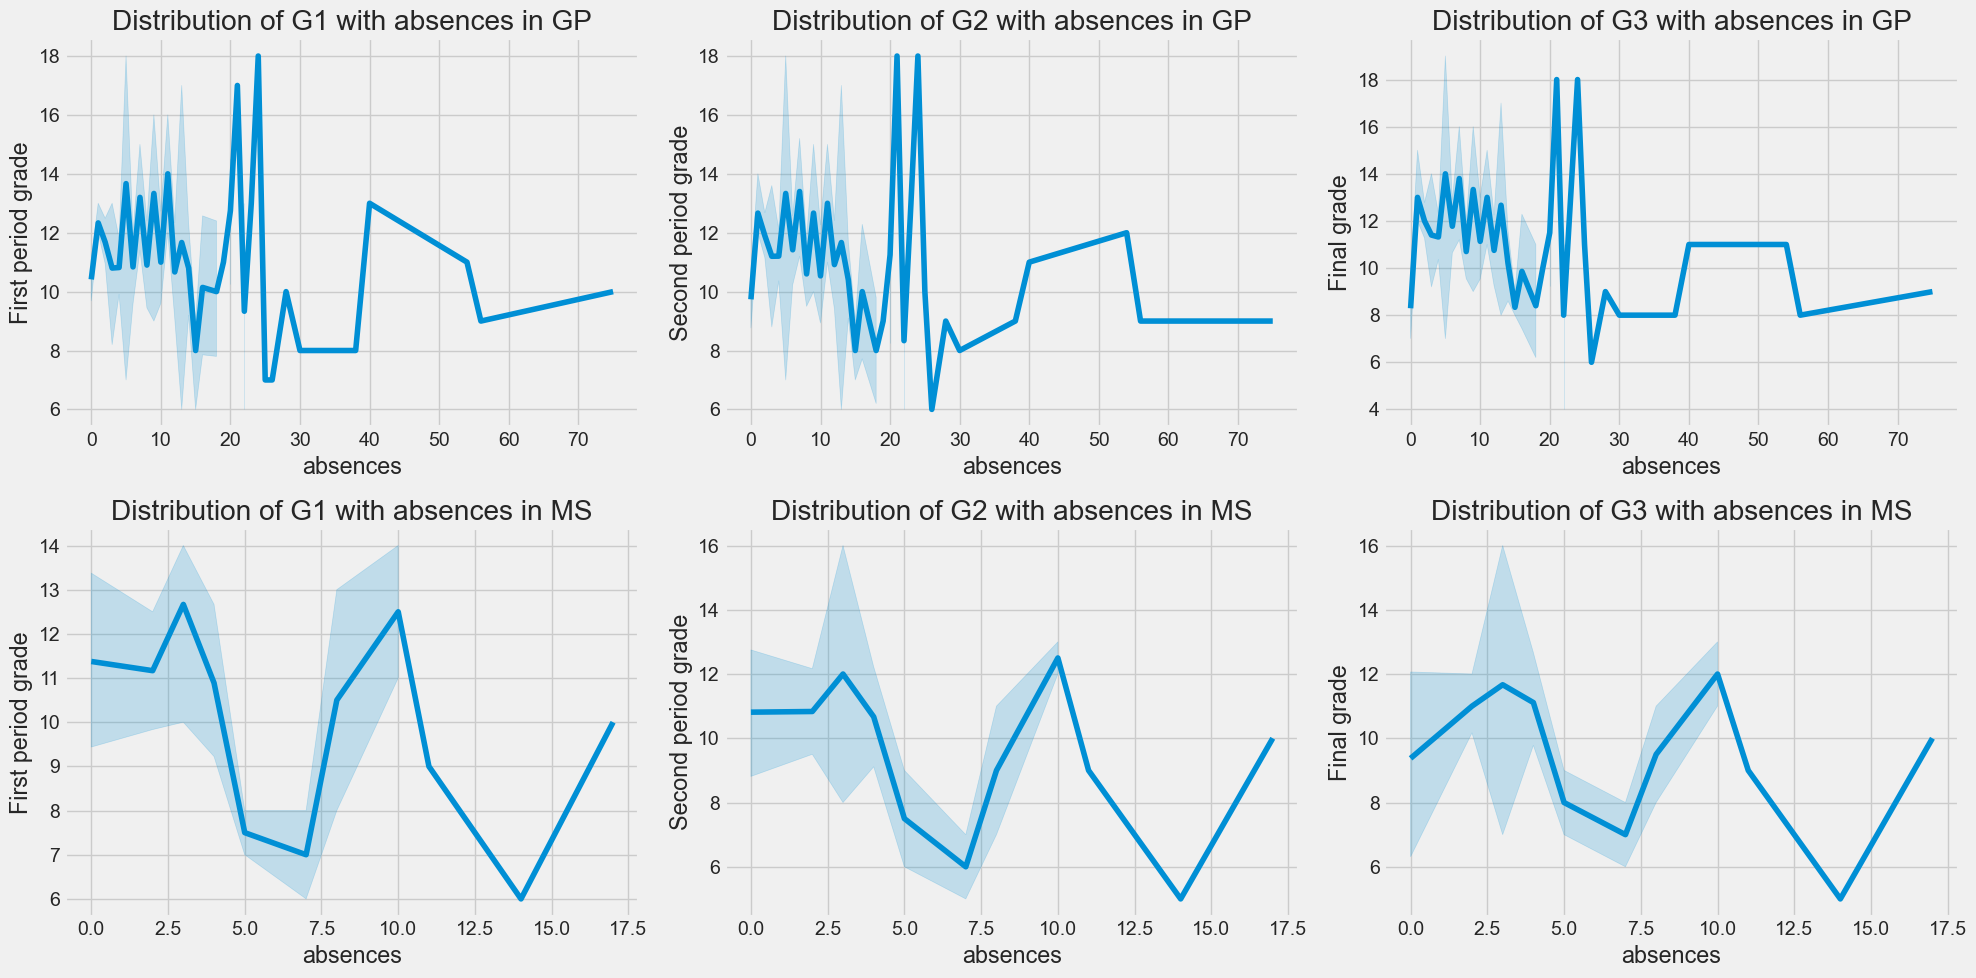

In [20]:
# Absences with grades each school
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, school in enumerate(data['school'].unique()):
    for j, grade in enumerate(grades):
        ax = axes[i][j]
        sns.lineplot(data=data.loc[data['school'] == school], x='absences', y=grade, ax=ax)
        ax.set_title(f"Distribution of {grade} with absences in {school}")
        ax.set_xlabel(f"absences")
        ax.set_ylabel(f"{grades_label[grade]}")
plt.tight_layout()
plt.show()

Từ các buổi đồ trên:
- Hầu như các học sinh có số lần nghỉ trung bình dưới 20 buổi thì có kết quả thi cuối kì tốt hơn so với các học sinh có số lần nghỉ trung bình trên 20 buổi.
- Đối với các học sinh ở trường Gabriel Pereira, số lần nghỉ trung bình dưới 20 buổi thì có kết quả thi cuối kì tốt hơn so với các học sinh có số lần nghỉ trung bình trên 20 buổi.
- Ở trường Moushiho da Silveria, các học sinh vắng mặt 3 buổi hoặc 10 buổi thì có kết quả thi cao hơn so với các trường hợp còn lại. 

#### Tỉ lệ sinh viên đạt điểm cuối kì phân bổ như thế nào theo các điểm số của các kỳ thi trước đó?

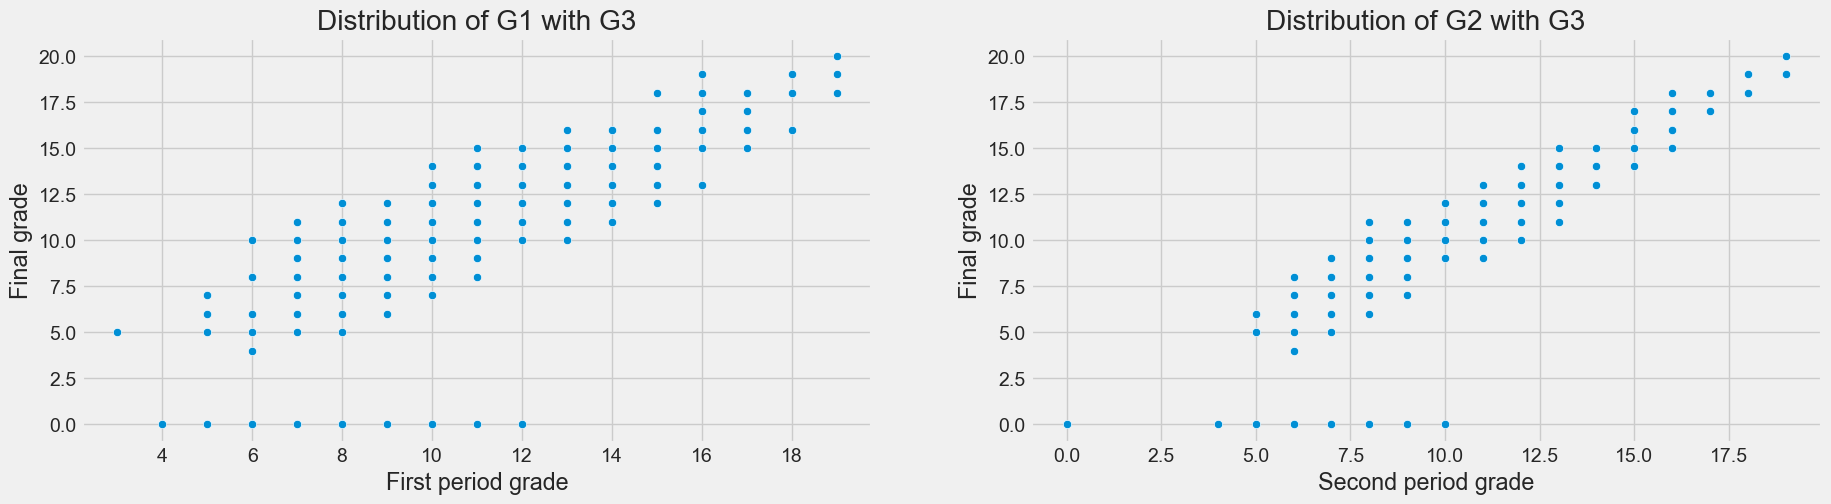

In [21]:
# Distribution of G1, G2, with G3
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
for i, grade in enumerate(grades[:-1]):
    ax = axes[i]
    sns.scatterplot(data=data, x=grade, y='G3', ax=ax)
    ax.set_title(f"Distribution of {grade} with G3")
    ax.set_xlabel(f"{grades_label[grade]}")
    ax.set_ylabel(f"{grades_label['G3']}")
plt.show()

Với sự phân bố của các điểm số của các kỳ thi trước đó (G1, G2) với kết quả thi cuối kì (G3), ta thấy rằng các điểm số của các kỳ thi trước đó có mối tương quan cao với kết quả thi cuối kì. Điều này có thể dễ dàng hiểu được vì các điểm số của các kỳ thi trước đó sẽ ảnh hưởng đến kết quả thi cuối kì. Điểm số của các kỳ thi trước đó càng cao thì kết quả thi cuối kì càng cao.

**Ngoài ra**, còn một số sự chú ý khác thông qua các câu hỏi được đặt ra như sau:
- Nam hay nữ sẽ chi trả nhiều thời gian hơn để đạt được kết quả thi cuối kì tốt hơn?
- Giới tính có ảnh hưởng đến kết quả thi cuối kì không?
- Các học sinh có thói quen uống rượu vào cuối tuần có kết quả thi cuối kì tốt hơn không?
- Độ tuổi chiếm trọng tâm trong bộ dữ liệu là bao nhiêu?
- ...
Và một số câu hỏi liên quan sẽ được đề cập đến sau.

In [22]:
# sns.pairplot(data[high_corr_features], kind='scatter', diag_kind='kde', hue='G3', palette='Blues')
# plt.subplots_adjust(hspace=0.5, wspace=0.5)
# plt.show()

Từ tập dữ liệu được cung cấp, trong tập dữ liệu sẽ bao gồm các học sinh của 2 trường khác nhau. Từ việc này, ta có thể phần tích từ một số câu hỏi:
- Tỉ lệ học sinh ở các trường trong tập dữ liệu như thế nào?

#### Tỉ lệ học sinh ở các trường trong tập dữ liệu như thế nào?

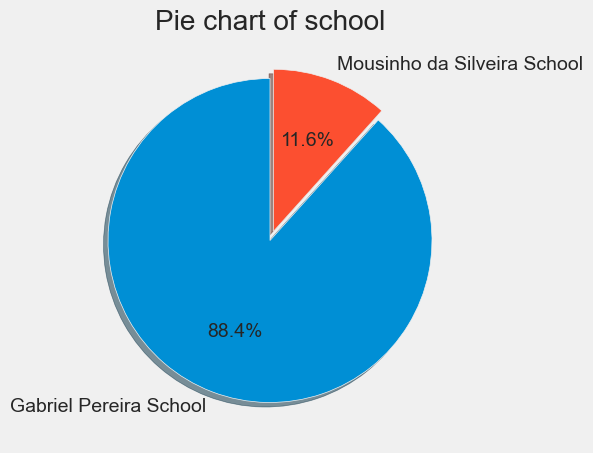

In [23]:
# Pie chart of school
plt.figure(figsize=(5,5))
school_labels = ['Gabriel Pereira School', 'Mousinho da Silveira School']
school_sizes = data['school'].value_counts().values
plt.pie(school_sizes, labels=school_labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.061))
plt.title("Pie chart of school")
plt.show()

Với biểu đồ trên, hầu như tỉ lệ học sinh của trường Gabriel Pereira nhiều hơn so với trường Mousinho da Silveira.

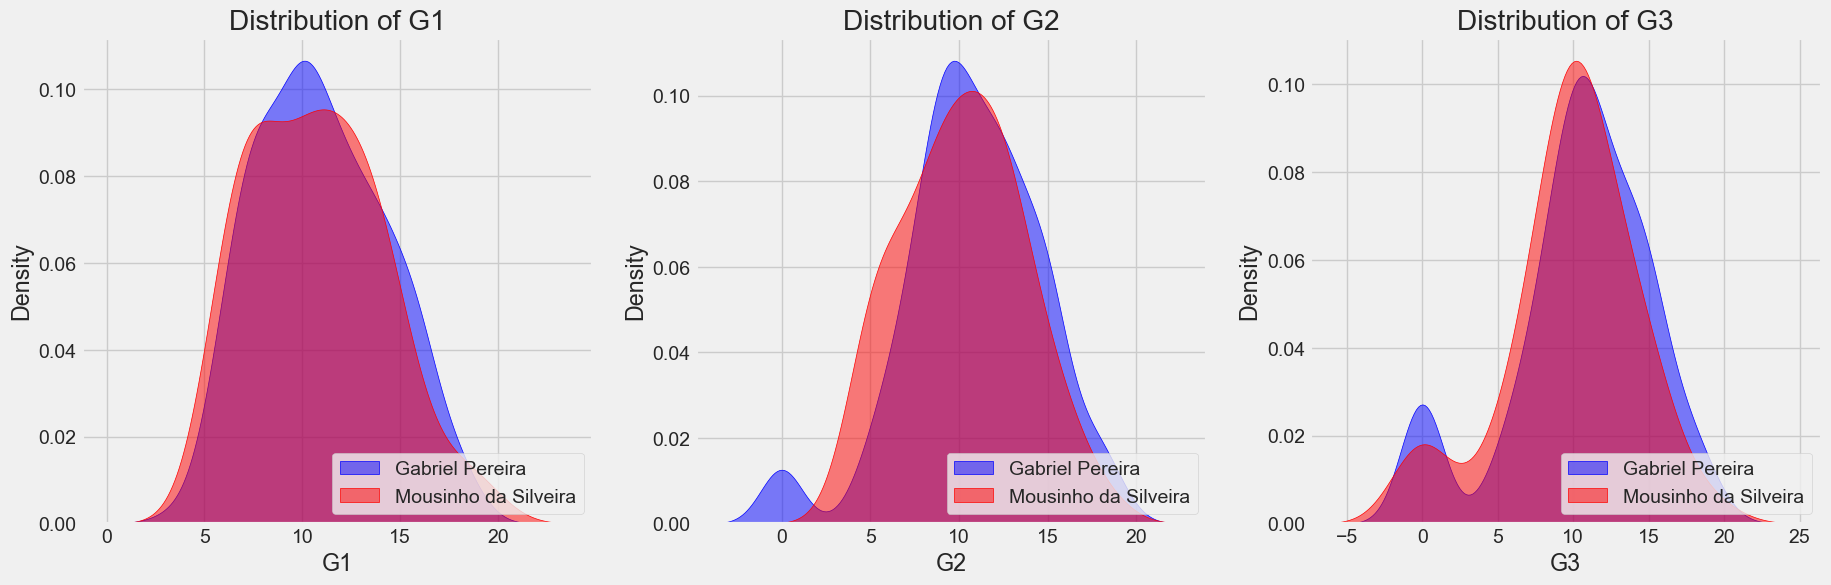

In [24]:
# Distribution of two schools with grades
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.kdeplot(data=data.loc[data['school'] == 'GP', grade], ax=ax,label='Gabriel Pereira', fill=True, alpha=0.5, color='blue')
    sns.kdeplot(data=data.loc[data['school'] == 'MS', grade], ax=ax,label='Mousinho da Silveira', fill=True, alpha=0.5, color='red')
    # set legend bottom right
    ax.legend(loc='lower right')
    ax.set_title(f"Distribution of {grade}")
    ax.set_xlabel(f"{grade}")
    ax.set_ylabel("Density")
    
# plt.tight_layout()
plt.show()

Với các biểu đồ phân phối của các trường với các điểm số, ta có thể thấy rằng:
- Các học sinh của trường Gabriel Pereira có kết quả thi cuối kì tốt hơn so với trường Mousinho da Silveira do một phần số lượng học sinh của trường Gabriel Pereira nhiều hơn và cũng có thể do thói quen học tập của các học sinh của trường Gabriel Pereira tốt hơn.

#### Giới tính có ảnh hưởng đến kết quả thi cuối kì không?
- Tỉ lệ giới tính của các học sinh như thế nào?
- Giới tính có ảnh hưởng đến kết quả thi cuối kì không?
- Với hai trường, tỉ lệ giới tính nam, nữ như thế nào?

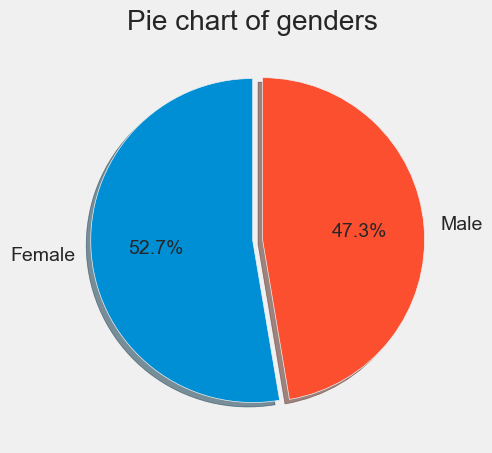

In [25]:
# The proportion of gender
plt.figure(figsize=(5,5))
gender_labels = ['Female', 'Male']
gender_size = data['sex'].value_counts().values
plt.pie(
    gender_size,
    labels=gender_labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    explode=(0, 0.061)
)
plt.title('Pie chart of genders')
plt.show()

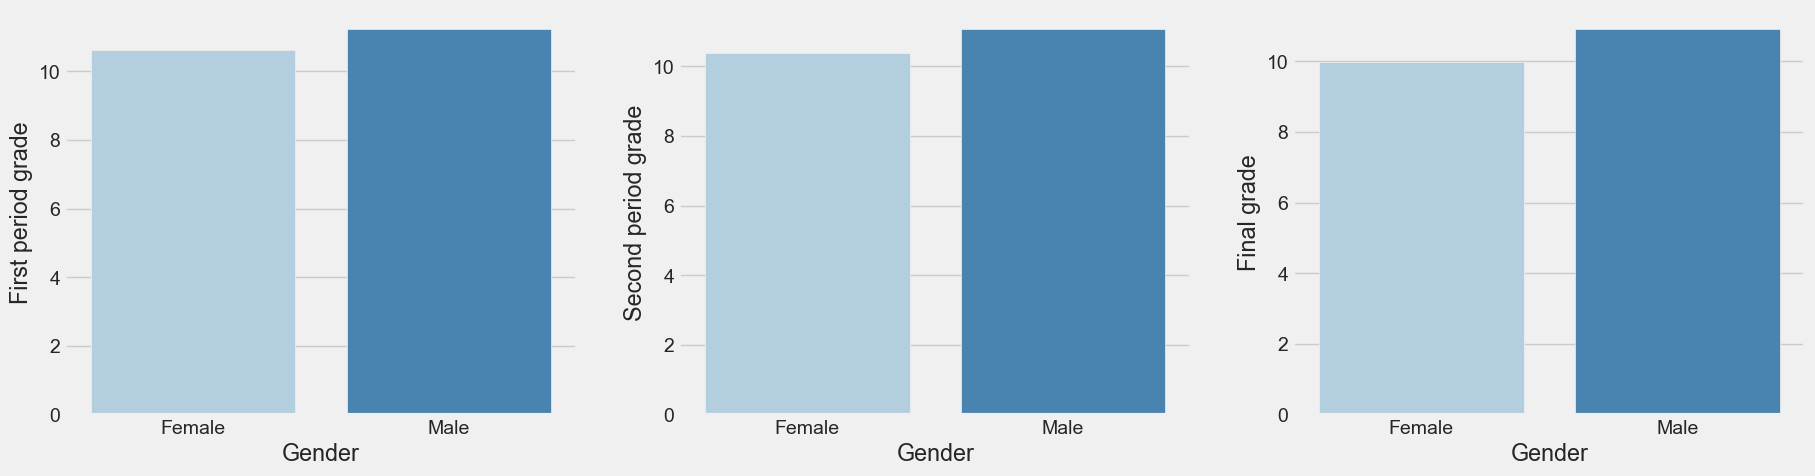

In [26]:
# The effect of gender with target
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='sex', y=grade, ax=ax, palette='Blues', errorbar=None)
    ax.set_xlabel('Gender')
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Female", "Male"])
plt.show()

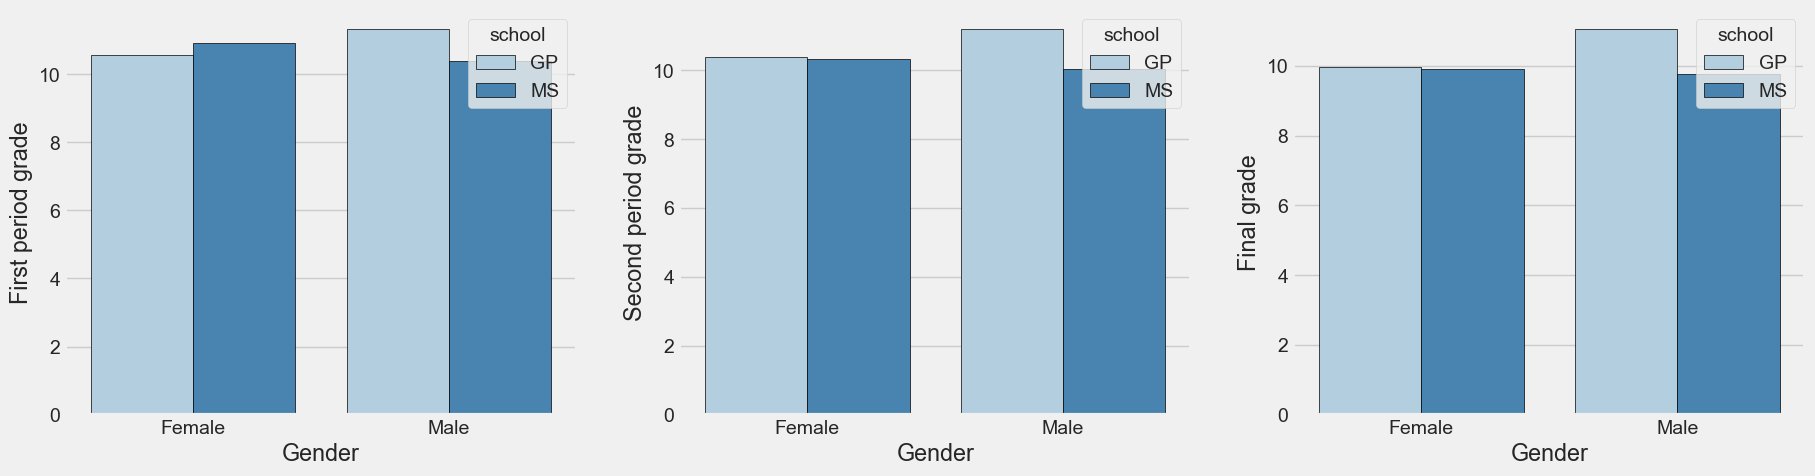

In [27]:
# The proportion of gender with target each school
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='sex', y=grade, ax=ax, palette='Blues', hue='school', errorbar=None, edgecolor='black')
    ax.set_xlabel("Gender")
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Female', 'Male'])
plt.show()

Với các bểu đồ trên, ta có thể thấy rằng:
- Tỉ lệ giới tính của các học sinh là 51.9% là nữ và 48.1% là nam.
- Đa số các học sinh nữ có kết quả thi cuối kì tốt hơn so với các học sinh nam.
- Các bạn học sinh nam lại có điểm cao hơn so với các bạn nữ ở trường Gabriel Pereira.

#### Độ tuổi chiếm trọng tâm trong bộ dữ liệu là bao nhiêu?
- Độ tuổi trung bình của các học sinh là bao nhiêu?
- Độ tuổi có ảnh hưởng đến kết quả thi cuối kì không?

In [28]:
# The average age of students
print(f"The average age of students: {data['age'].mean()}")

The average age of students: 16.696202531645568


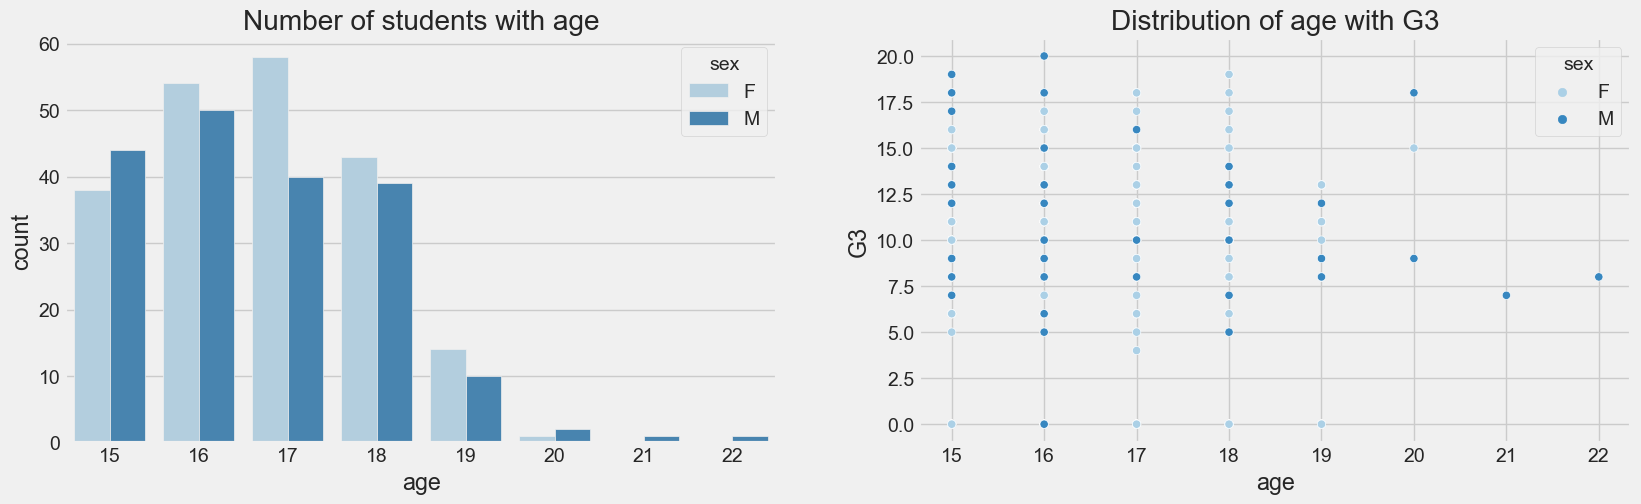

In [29]:
# The effect of age with target
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes[0].set_title("Number of students with age")
sns.countplot(data=data, x='age', ax=axes[0], palette='Blues', hue='sex')
axes[1].set_title("Distribution of age with G3")
sns.scatterplot(data=data, x='age', hue='sex', y='G3', ax=axes[1], palette='Blues')
plt.show()
# The proportion of address

Với 2 biểu đồ trên, ta có thể thấy rằng:
- Độ tuổi trung bình trong tập dữ liệu giao động từ 15 đến 18 tuổi.
- Đối với các học sinh ở độ tuổi 20, có rất ít dữ liệu được thống kê, có thể do độ tuổi này không phổ biến trong các học sinh. Đối với bộ dữ liệu này, có thể sẽ không nhất quán khi phần tích với biểu đồ cột.

#### Địa chỉ có là một phần của bộ dữ liệu?

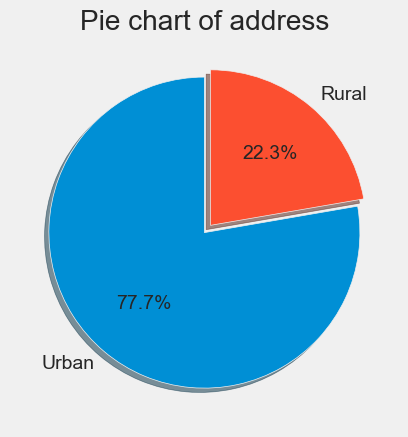

In [30]:
# Distribution of address
address_labels = ['Urban', 'Rural']
address_size = data['address'].value_counts().values
plt.pie(
    address_size,
    labels=address_labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    explode=(0, 0.061)
)
plt.title('Pie chart of address')
plt.show()

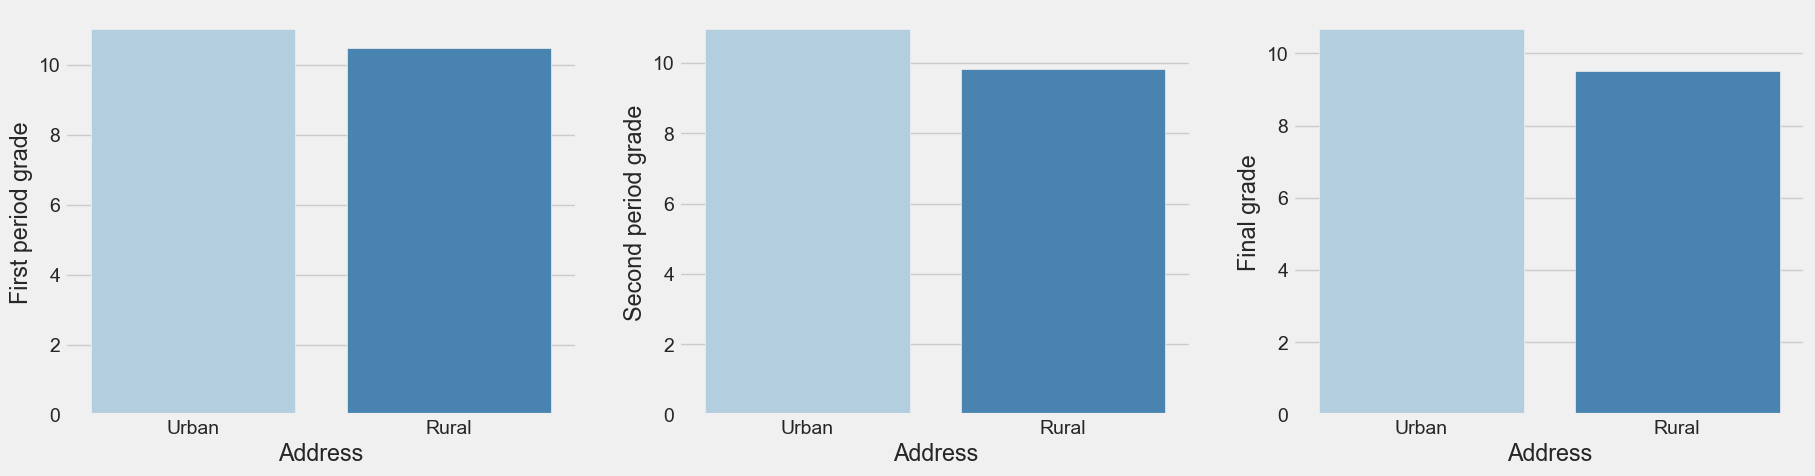

In [31]:
# The effect of address with target
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='address', y=grade, ax=ax, palette='Blues', errorbar=None)
    ax.set_xlabel('Address')
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Urban", "Rural"])
plt.show()

Với biểu đồ trên, ta có thể thấy rằng:
- Đa số các học sinh đến từ thành phố.
- Có thể do các học sinh đến từ thành phố có điều kiện học tập tốt hơn so với các học sinh đến từ nông thôn. Nhưng trái ngược lại với điều này, các học sinh đến từ nông thôn có kết quả thi cuối kì tốt hơn so với các học sinh đến từ thành phố.

#### Số lượng thành viên trong gia đình có ảnh hưởng đến kết quả thi cuối kì không?
Với bộ dữ liệu này, ta có số lượng gia đình dược xác định trong khoảng từ 3 đến 6 thành viên. Với các gia đình có số lượng thành viên từ 1 đến 2 thành viên, ta có thể xem xét như là các gia đình có số lượng thành viên là 3 thành viên.

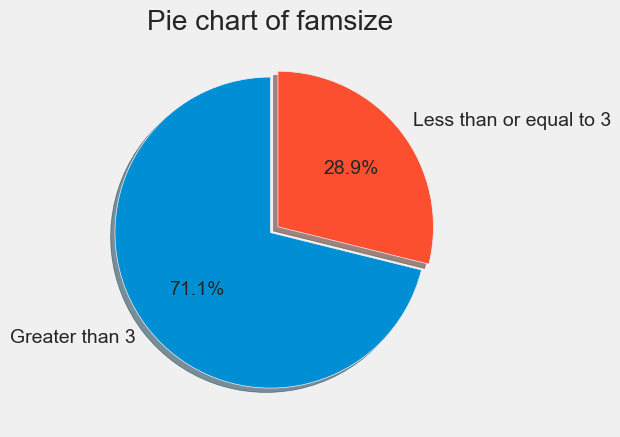

In [32]:
# Distribution of famsize   
famsize_labels = ['Greater than 3', 'Less than or equal to 3']
famsize_size = data['famsize'].value_counts().values
plt.pie(
    famsize_size,
    labels=famsize_labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    explode=(0, 0.061)
)
plt.title('Pie chart of famsize')
plt.show()

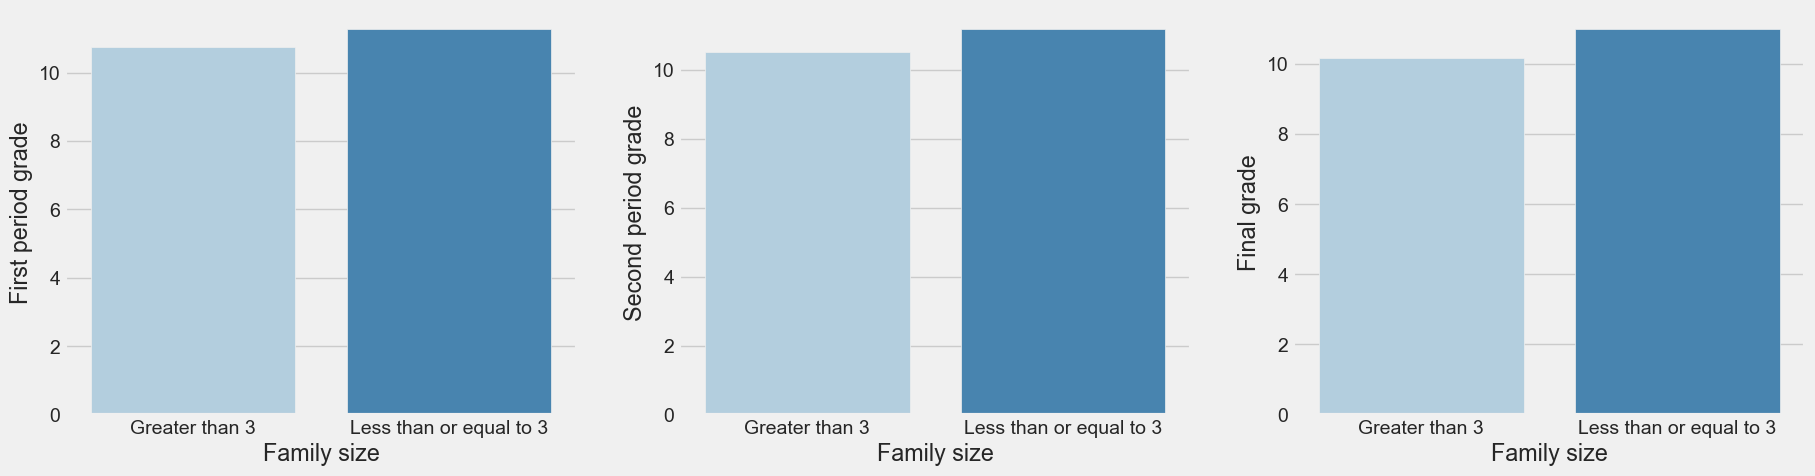

In [33]:
# Distribution of famsize with grades
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='famsize', y=grade, ax=ax, palette='Blues', errorbar=None)
    ax.set_xlabel('Family size')
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Greater than 3", "Less than or equal to 3"])
plt.show()

Với 2 biểu đồ trên, ta có thể thấy rằng:
- Đa số các học sinh đến từ các gia đình có số lượng thành viên lớn hơn 3.
- Các học sinh đến từ các gia đình có số lượng thành viên nhỏ hơn hoặc bằng 3 có kết quả thi cuối kì tốt hơn so với các học sinh đến từ các gia đình có số lượng thành viên lớn hơn 3.

#### Tình trạng hôn nhân của bố mẹ có ảnh hưởng đến kết quả thi cuối kì không?

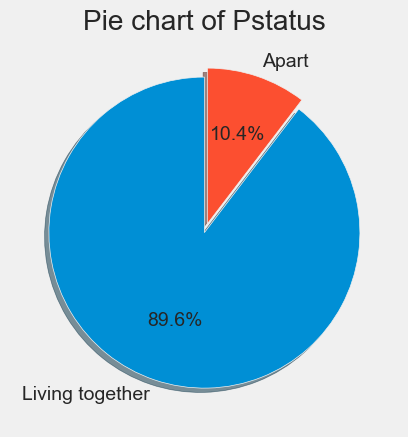

In [34]:
# Distribution of Pstatus
Pstatus_labels = ['Living together', 'Apart']
Pstatus_size = data['Pstatus'].value_counts().values
plt.pie(
    Pstatus_size,
    labels=Pstatus_labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    explode=(0, 0.061)
)
plt.title('Pie chart of Pstatus')
plt.show()

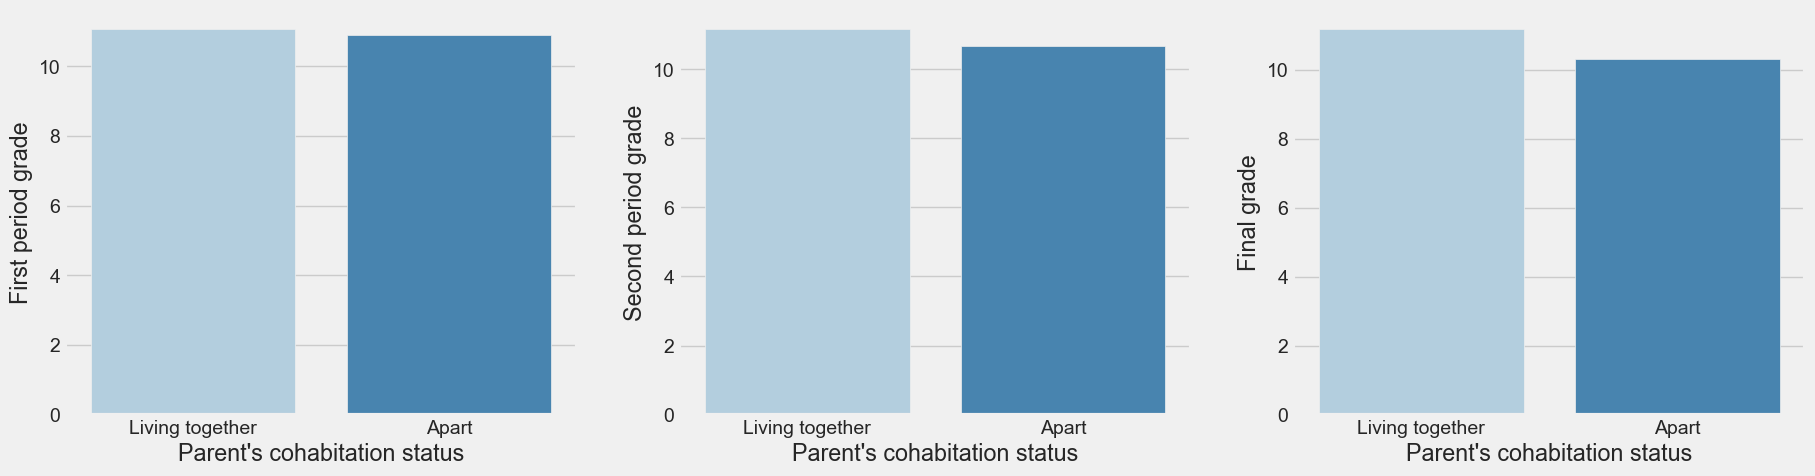

In [35]:
# Distribution of Pstatus with grades
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='Pstatus', y=grade, ax=ax, palette='Blues', errorbar=None)
    ax.set_xlabel('Parent\'s cohabitation status')
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Living together", "Apart"])
plt.show()

- Hầu như các học sinh đến từ các gia đình mà bố mẹ sống chung nhau.
- Các học sinh đến từ các gia đình mà bố mẹ sống chung nhau có kết quả thi cuối kì tốt hơn so với các học sinh đến từ các gia đình mà bố mẹ sống riêng biệt. Có thể là do sự giao dục từ gia đình cũng la một phần aảnh hưởng đến kết quả bài thi của các học sinh.

#### Mức độ học vấn của bố mẹ có ảnh hưởng đến kết quả thi cuối kì không?

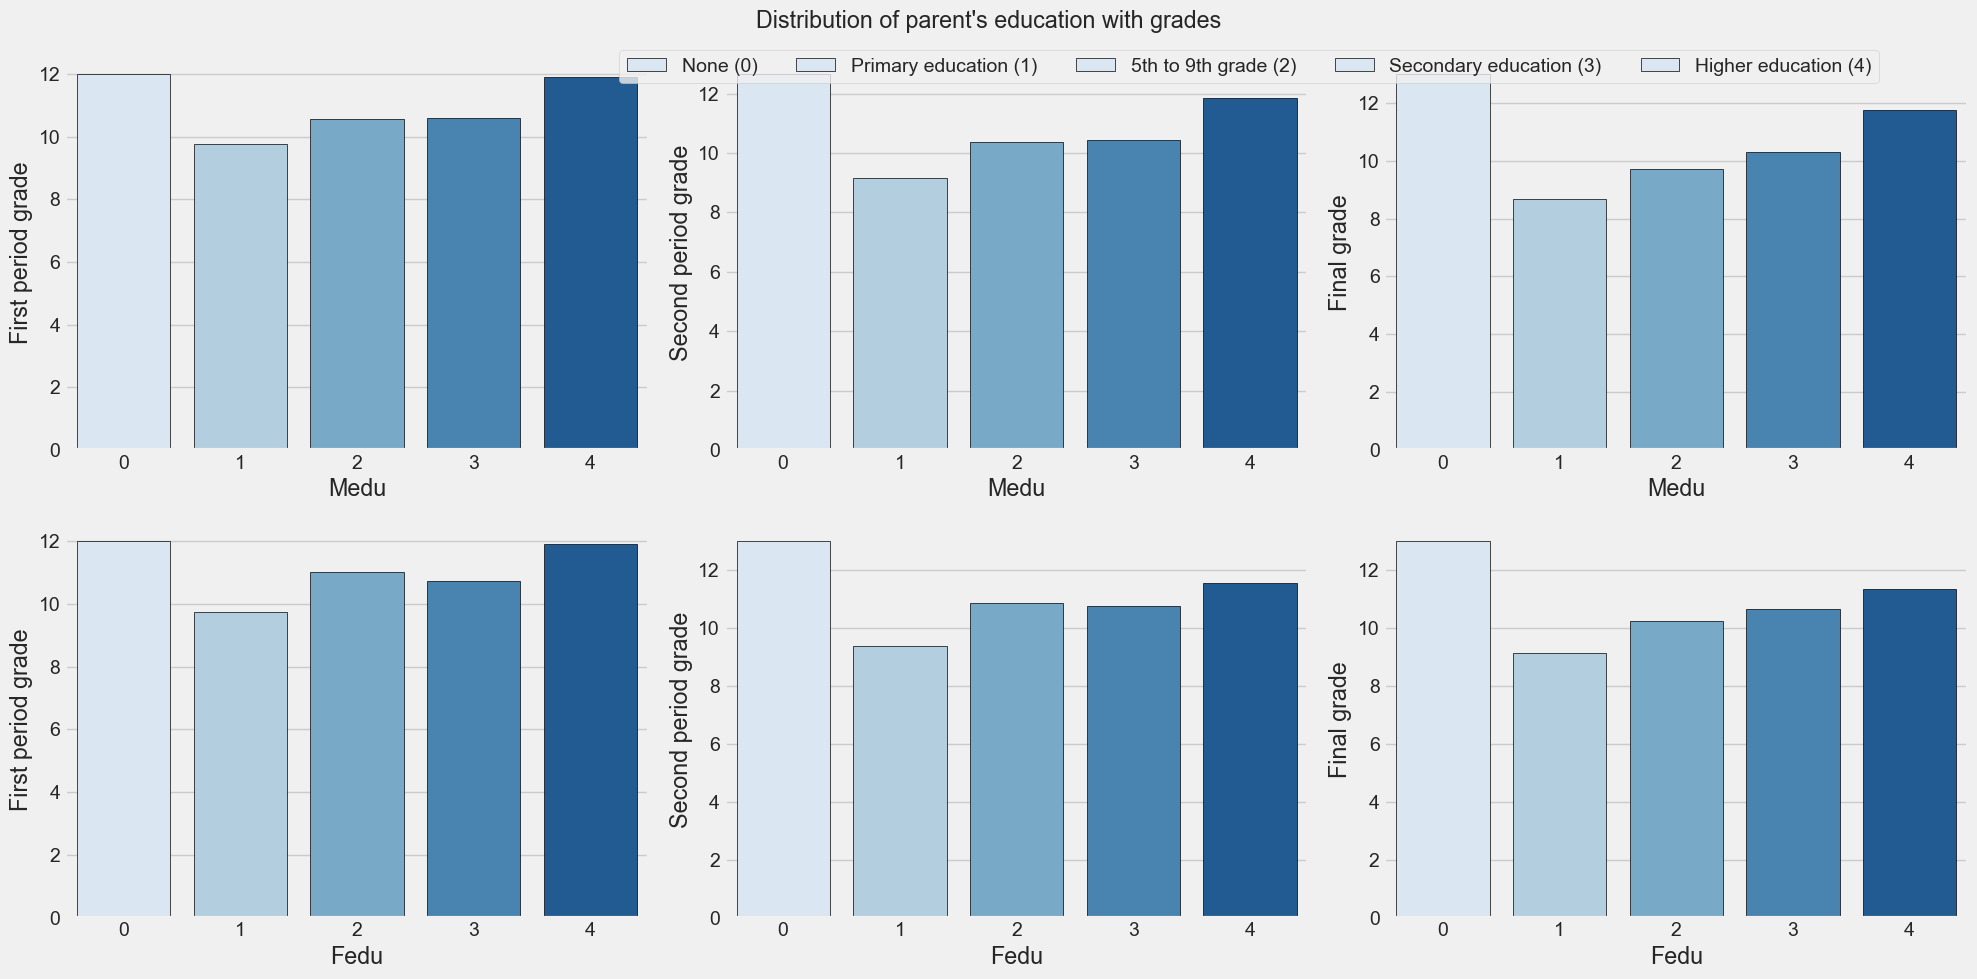

In [36]:
# Distribution of Medu
edu_labels = ['None (0)', 'Primary education (1)', '5th to 9th grade (2)', 'Secondary education (3)', 'Higher education (4)']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, parent_edu in enumerate(['Medu', 'Fedu']):
    for j, grade in enumerate(grades):
        ax = axes[i][j]
        g = sns.barplot(data=data, x=parent_edu, y=grade, ax=ax, palette='Blues', errorbar=None, edgecolor='black')
        ax.set_xlabel(f"{parent_edu}")
        ax.set_ylabel(f"{grades_label[grade]}")

fig.suptitle("Distribution of parent's education with grades")
fig.legend(
    edu_labels,
    loc='upper right',
    bbox_to_anchor=(0.95, 0.95),
    bbox_transform=plt.gcf().transFigure,
    ncol=5
)
plt.tight_layout()
plt.show()

Với các biểu đồ trên, ta có thể thấy rằng:
- Đa số học sinh đều xuất phát cao ở gia định thất học (None).
- Có vẻ họ khuyến khích và động viên con mình học nhiều hơn.

#### Nghề nghiệp của bố mẹ có ảnh hưởng đến kết quả thi cuối kì không?

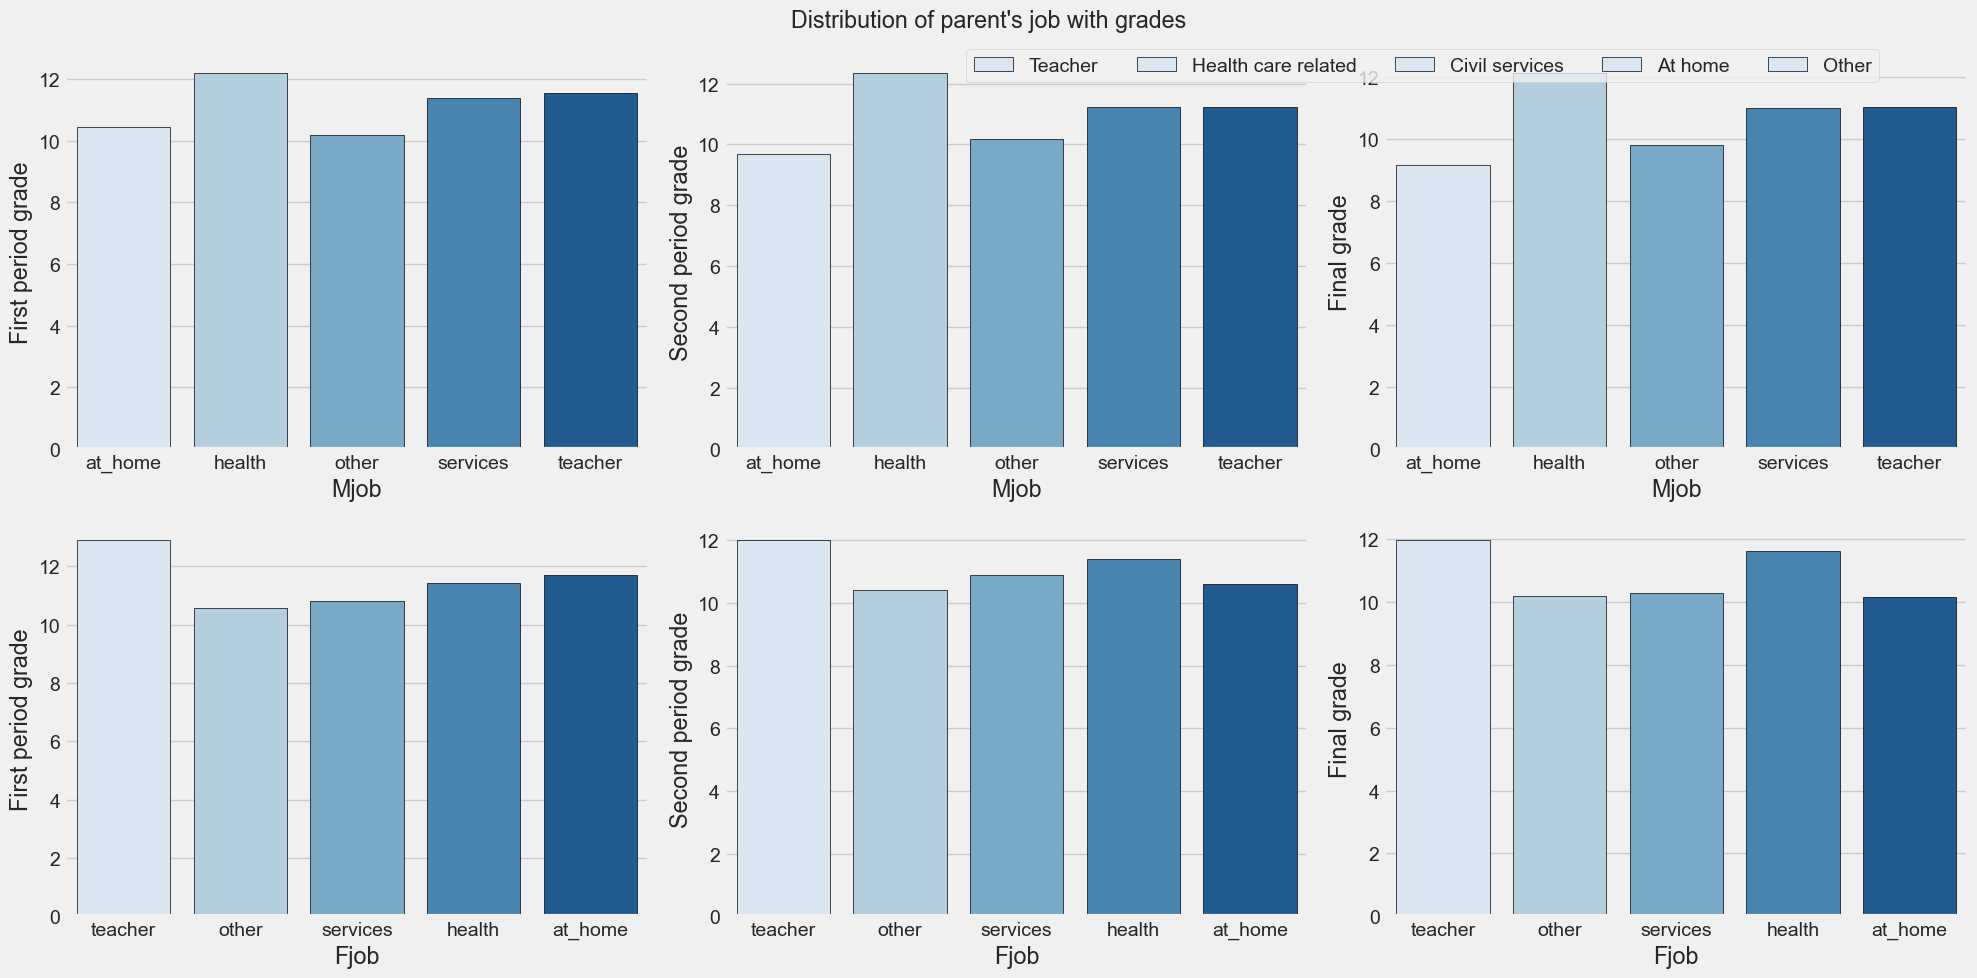

In [37]:
# Distribution of Mjob
Mjob_labels = ['Teacher', 'Health care related', 'Civil services', 'At home', 'Other']
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, parent_job in enumerate(['Mjob', 'Fjob']):
    for j, grade in enumerate(grades):
        ax = axes[i][j]
        sns.barplot(data=data, x=parent_job, y=grade, ax=ax, palette='Blues', errorbar=None, edgecolor='black')
        ax.set_xlabel(f"{parent_job}")
        ax.set_ylabel(f"{grades_label[grade]}")
fig.suptitle("Distribution of parent's job with grades")
fig.legend(
    Mjob_labels,
    loc='upper right',
    bbox_to_anchor=(0.95, 0.95),
    bbox_transform=plt.gcf().transFigure,
    ncol=5
)
plt.tight_layout()
plt.show()

Với các biểu đồ trên, ta có thể thấy rằng:
- Đa số các bố mẹ của các học sinh đều làm việc trong lĩnh vực giáo dục.
- Những ngươi có bố làm trong lĩnh vực giao dục hoặc y tế thì có kết quả thi cuối kì tốt hơn so với các người có bố làm trong lĩnh vực khác. Một số nguyên nhân cũng là do:
    - Các bố làm trong 2 lĩnh vực này có thể cung cấp môi trường học tuyệt vời cho con cái tại nhà, một phần cũng có thể do kiến thức của họ cũng có thể cao hơn so với các lĩnh vực khác.
    - Một phần cũng có thể do môi trường của họ được cung cấp đầy đủ các tài liệu học tập, sách vở cho việc nghiên cứu, giảng dạy hơn.
- Đối với việc làm của mẹ, những người làm trong lĩnh vực y tế thì có kết quả thi cuối kì tốt hơn so với các người làm trong lĩnh vực khác.
    - Tương tự như trường hợp của bố, một phần cũng có thể do môi trường của họ được cung cấp đầy đủ các tài liệu học tập, sách vở cho việc nghiên cứu, giảng dạy hơn.
    - Những kinh nghiệm được đút kết từ công việc của mẹ có thể được chia sẻ cho con cái.   

#### Lý do chọn trường học có ảnh hưởng đến kết quả thi cuối kì không?

E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


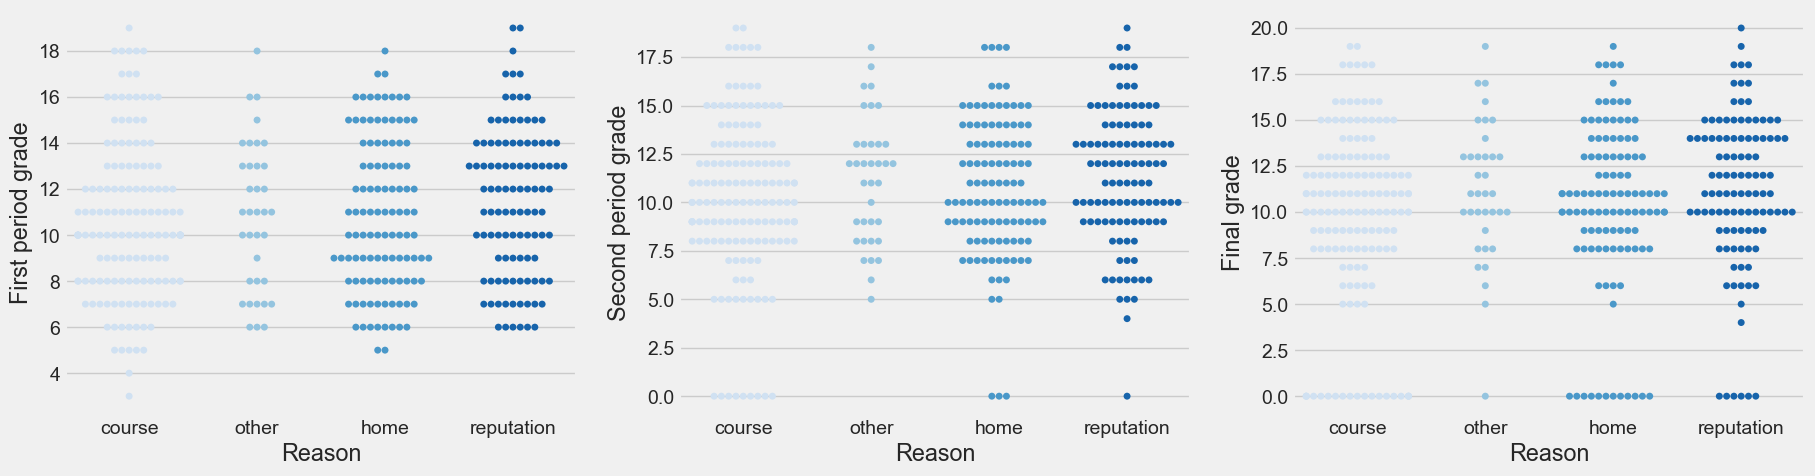

In [38]:
# Distribution of reason with target
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.swarmplot(data=data, x='reason', y=grade, ax=ax,hue='reason', palette='Blues', edgecolor='black', legend=False)
    ax.set_xlabel('Reason')
    ax.set_ylabel(f"{grades_label[grade]}")
plt.show()

Với các biểu đồ trên, ta có thể thấy rằng:
- Hầu như các học sinh chọn trường vì một số lí do như: trường gần nhà, trường có chất lượng giảng dạy tốt, trường có chương trình học phù hợp với mình.

#### Người giám hộ của học sinh có ảnh hưởng như thế nào với mục tiêu?

E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\sea

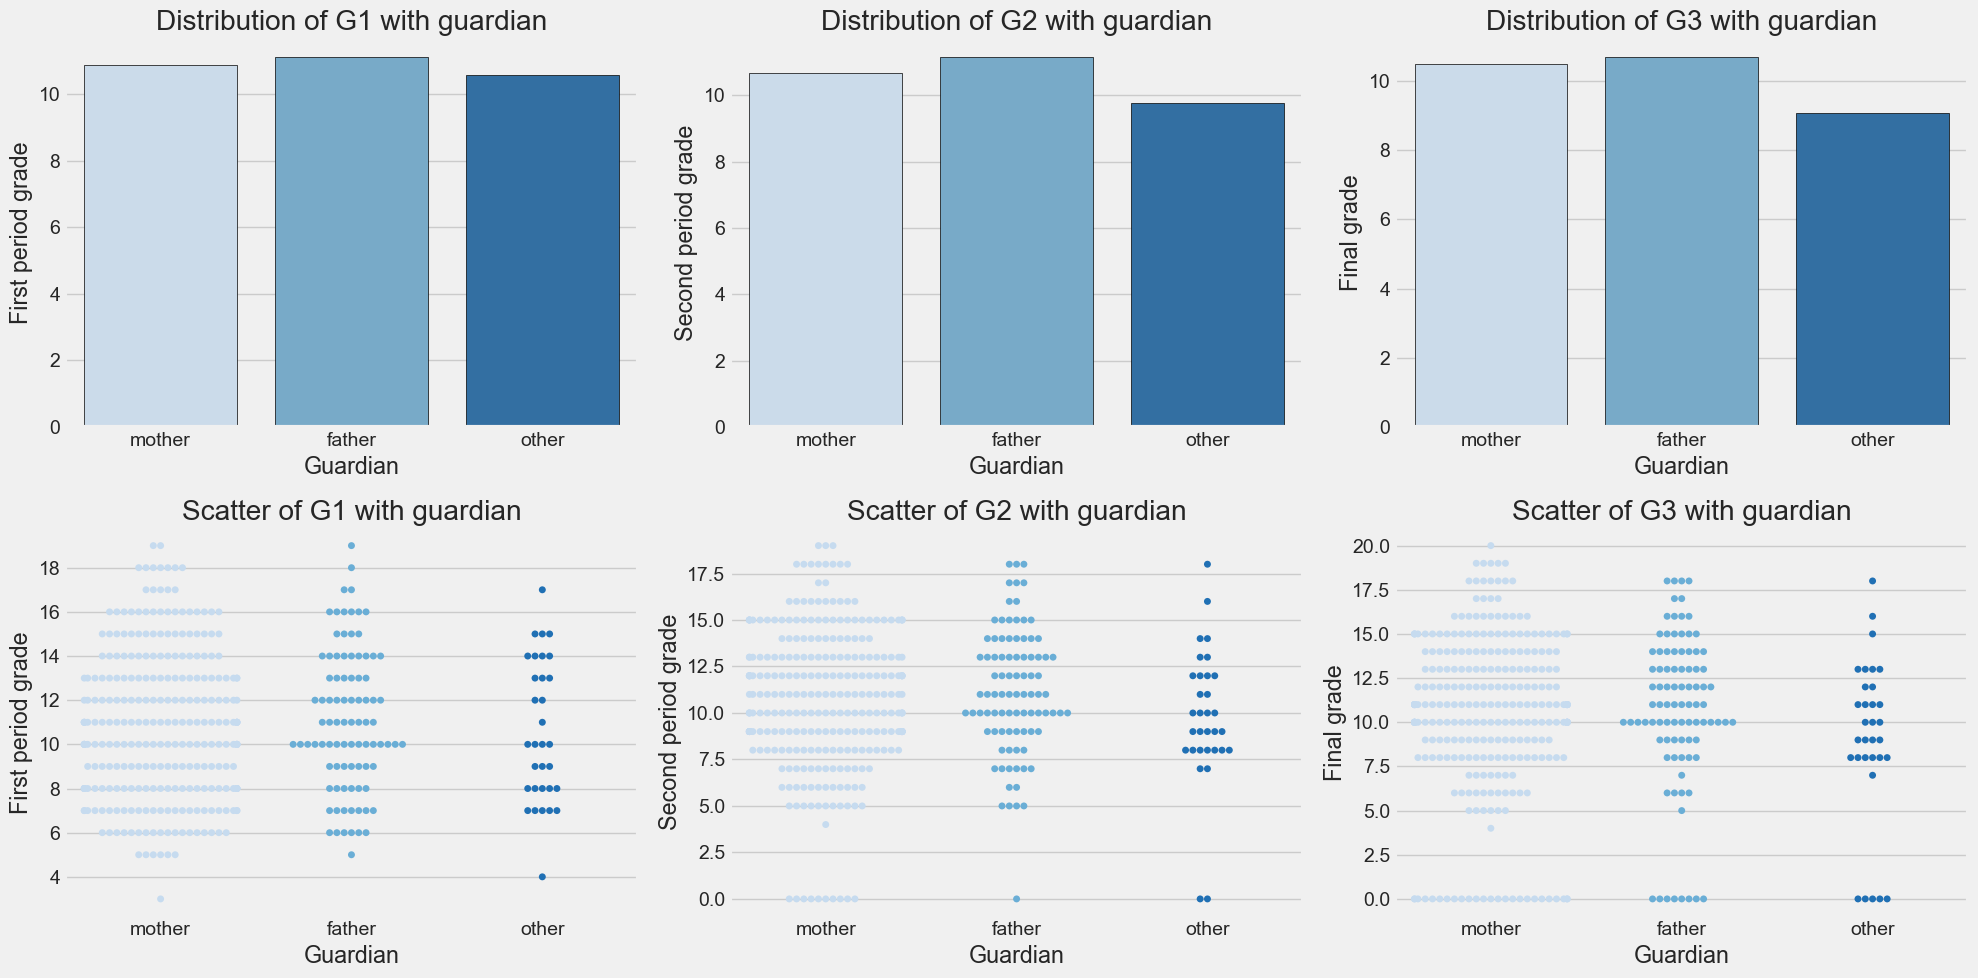

In [39]:
# Distribution of guardian with target
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, grade in enumerate(grades):
    ax = axes[0][i]
    sns.barplot(data=data, x='guardian', y=grade, ax=ax, palette='Blues', errorbar=None, edgecolor='black')
    ax.set_xlabel('Guardian')
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_title(f"Distribution of {grade} with guardian")
    
for i, grade in enumerate(grades):
    ax = axes[1][i]
    sns.swarmplot(data=data, x='guardian', y=grade, ax=ax,hue='guardian', palette='Blues', edgecolor='black', legend=False)
    ax.set_xlabel('Guardian')
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_title(f"Scatter of {grade} with guardian")
plt.tight_layout()
plt.show()

Với hai biểu đồ trên, ta có thể thấy rằng:
- Đa số đại diện giám hộ cho học sinh đều là mẹ của học sinh.
- Với người giám hộ là bố hoặc mẹ của học sinh, thì kết quả thi cuối kì của học sinh sẽ tốt hơn so với người giám hộ là người khác.

#### Thời gian học của học sinh có ảnh hưởng đến kết quả thi cuối kì không?
- Tỉ lệ học tập của các học sinh như thế nào?
- Nam hay nữ sẽ chi trả nhiều thời gian hơn để đạt được kết quả thi cuối kì tốt hơn?
- Thời gian học của các học sinh có ảnh hưởng đến kết quả thi cuối kì không?
- Độ phân bố về thời gian học của các học sinh cửa các trường như thế nào?

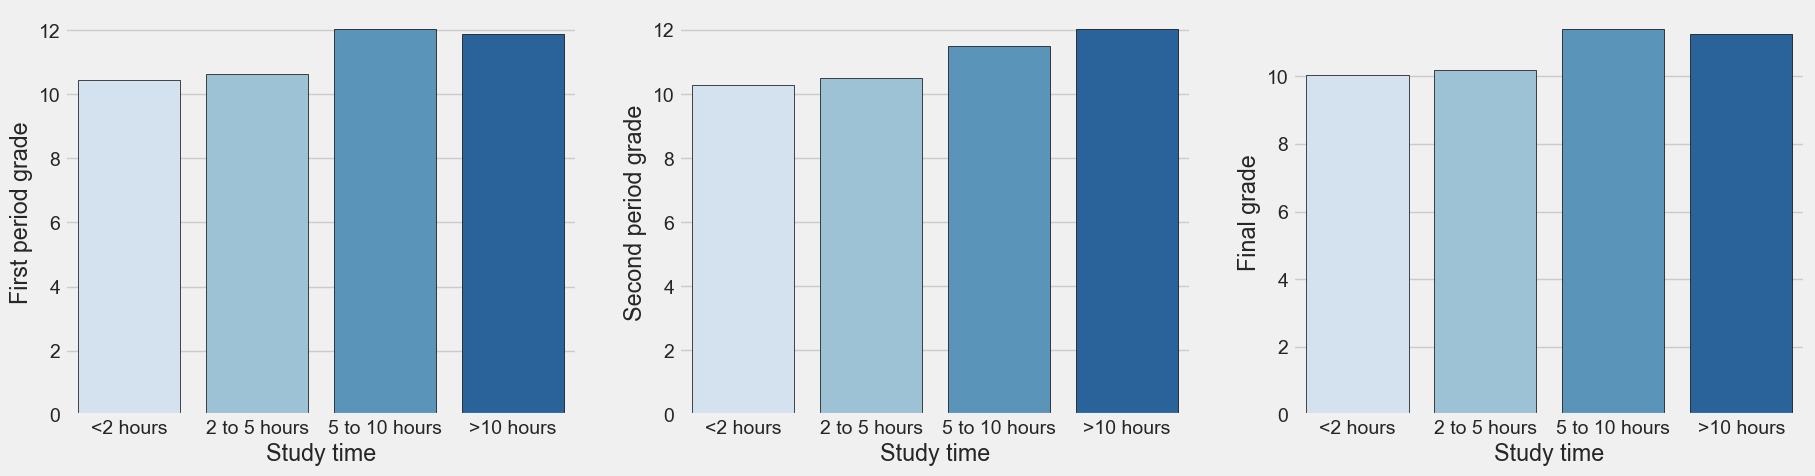

In [41]:
# Distribution of studytime with target
study_time_labels = ['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='studytime', y=grade, ax=ax, palette='Blues', errorbar=None, edgecolor='black')
    ax.set_xlabel('Study time')
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(study_time_labels)
plt.show()

E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\STUDY_VENDORs\anaconda\envs\myenv\lib\site-packages\s

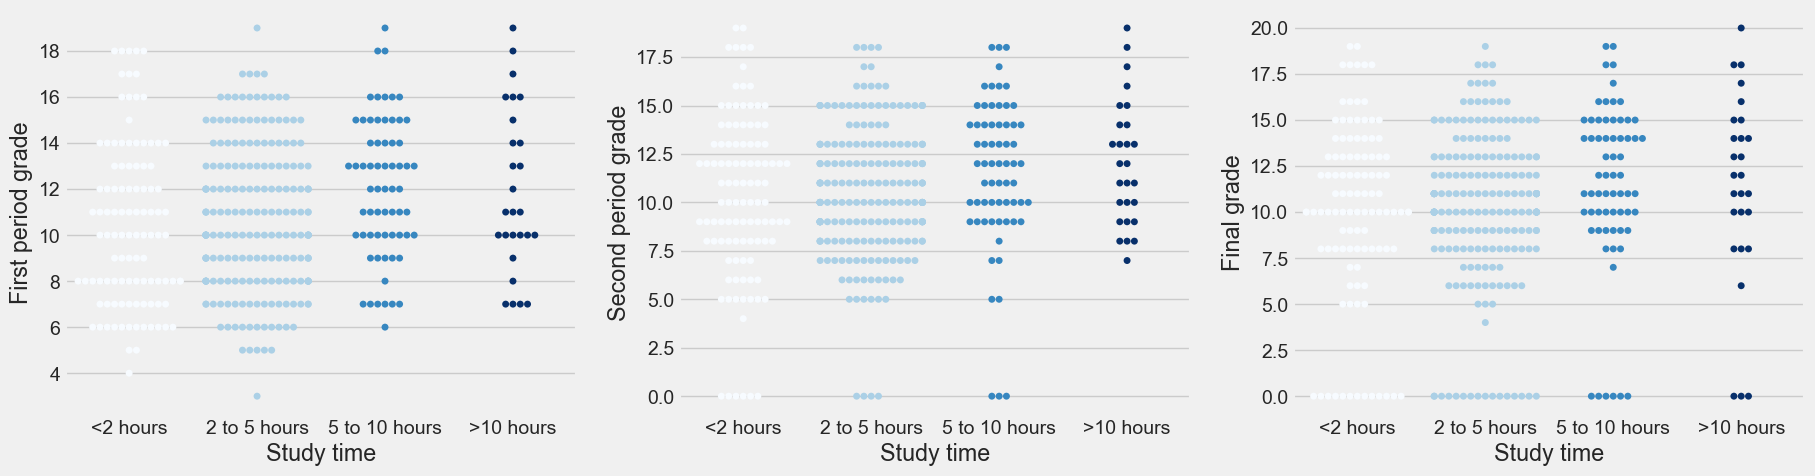

In [42]:
# Scatter of studytime with target
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.swarmplot(data=data, x='studytime', y=grade, ax=ax,hue='studytime', palette='Blues', edgecolor='black', legend=False)
    ax.set_xlabel('Study time')
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(study_time_labels)
plt.show()

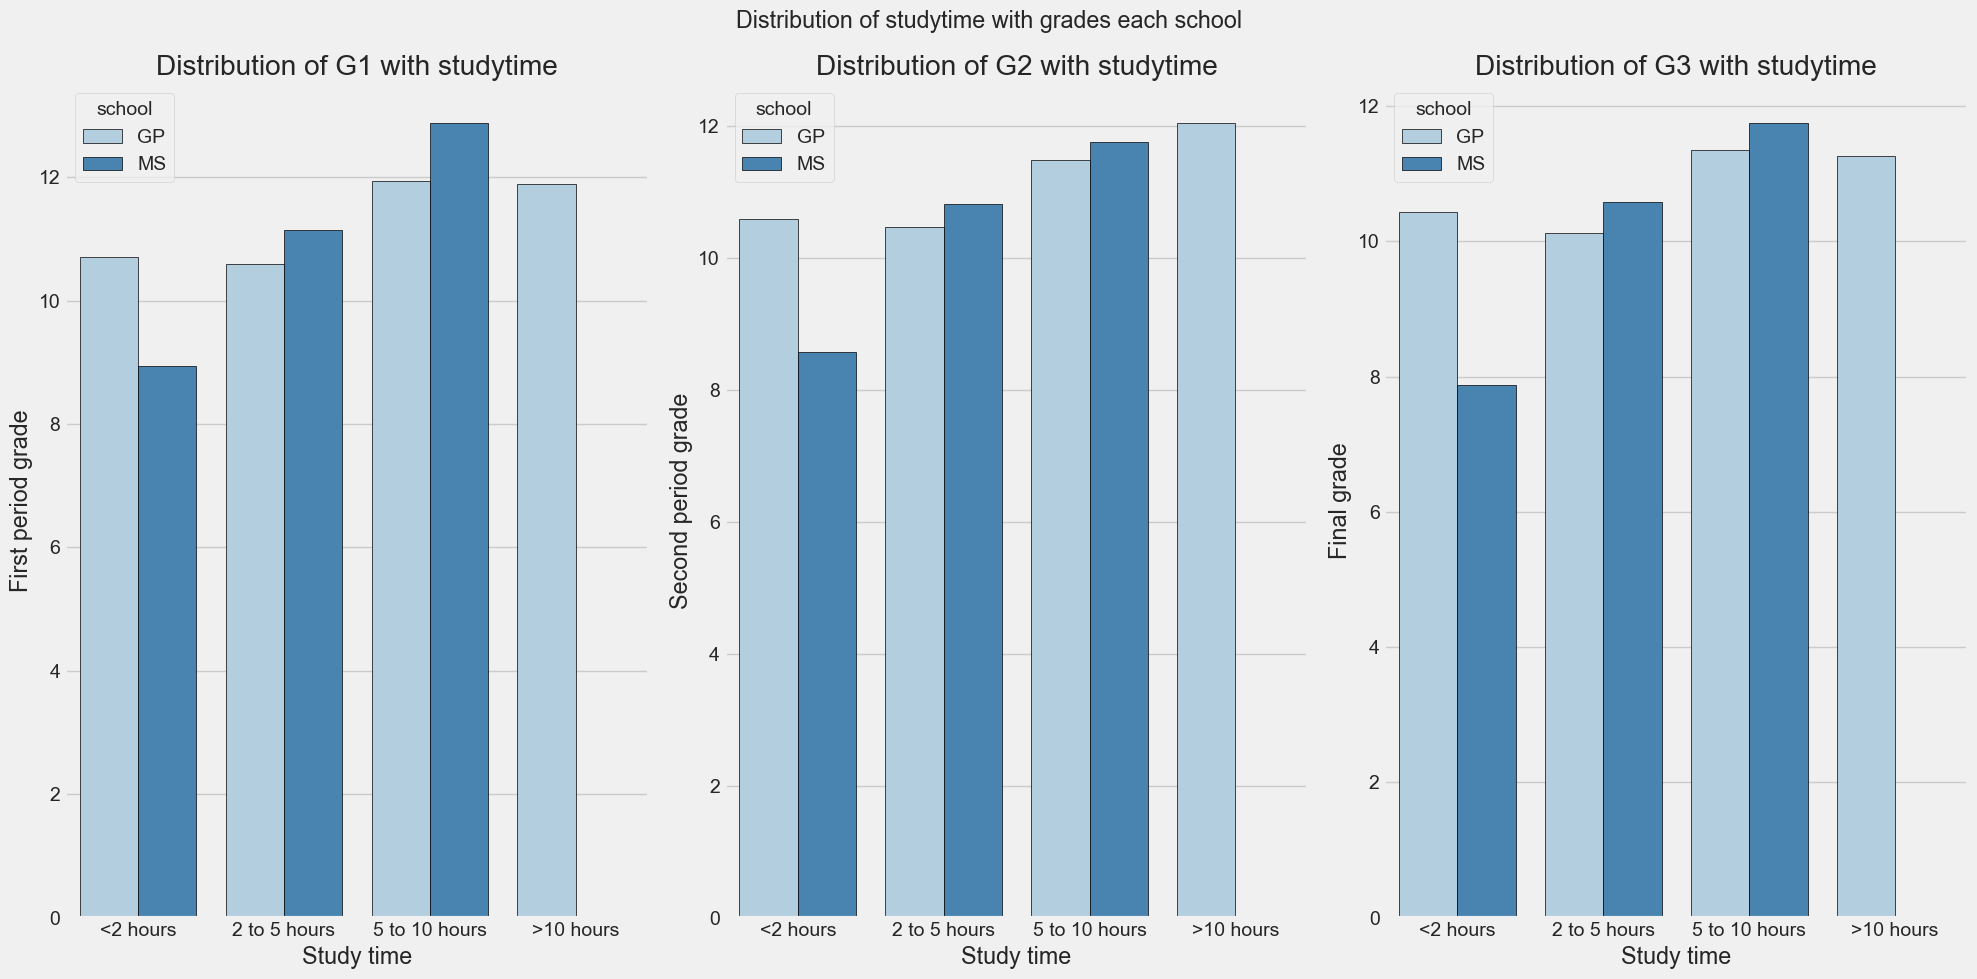

In [48]:
# Distribution of studytime with target each school
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='studytime', y=grade, ax=ax, palette='Blues', hue='school', errorbar=None, edgecolor='black')
    ax.set_title(f"Distribution of {grade} with studytime")
    ax.set_xlabel('Study time')
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(study_time_labels)

fig.suptitle("Distribution of studytime with grades each school")
plt.tight_layout()
plt.show()

Với các biểu đồ trên, ta có thể thấy rằng:
- Đa số các học sinh dành thời gian học từ 2 đến 5 giờ mỗi tuần.
- Như hiển nhiên, nhiều học sinh có thói quen học tập nhiều hơn thì kết quả thi cuối kì cũng tốt hơn.

#### Hổ trợ từ bên ngoài đối với các học sinh có ảnh hưởng như thế nào?
- Các sự hổ trợ từ phía gia đình, trường học, bạn bè, khác có ảnh hưởng đến kết quả thi cuối kì không?
- Thành tích của các học sinh được hổ trợ sẽ như thế nào?

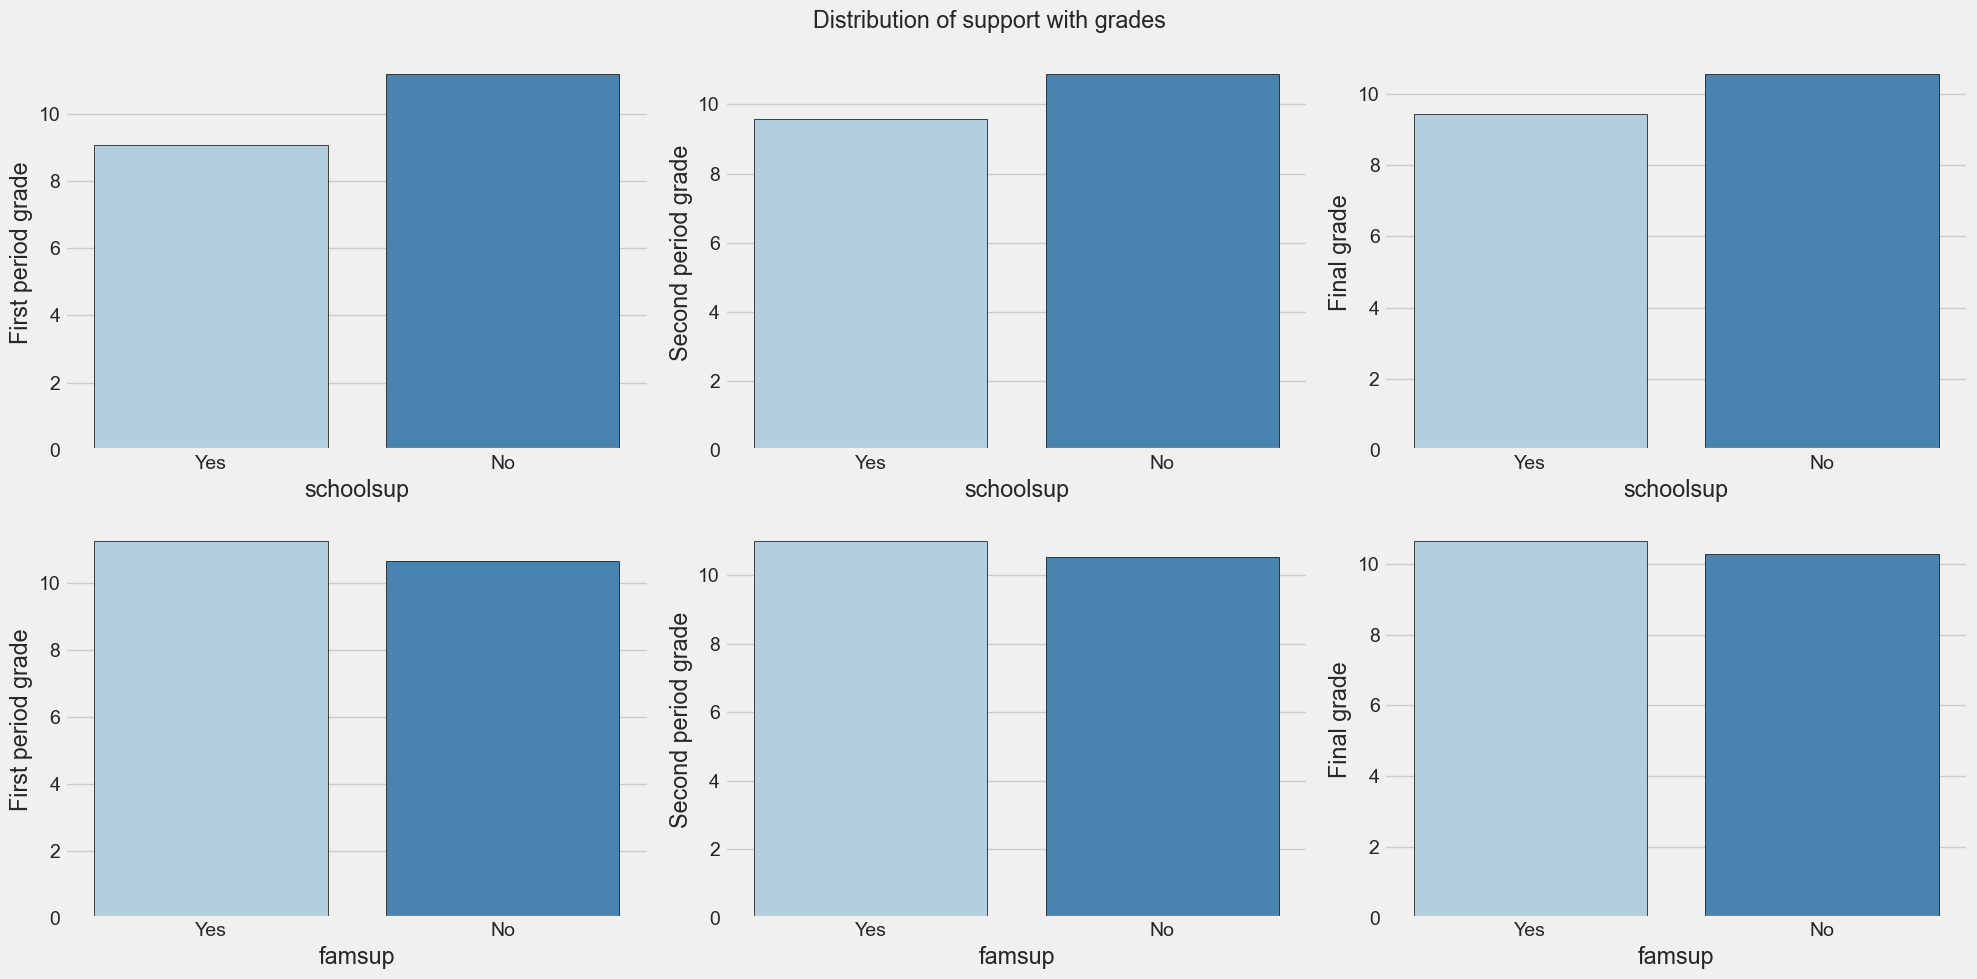

In [49]:
# Distribution of support with target
support_labels = ['Yes', 'No']
extra_support = ['schoolsup', 'famsup']
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, support in enumerate(extra_support):
    for j, grade in enumerate(grades):
        ax = axes[i][j]
        sns.barplot(data=data, x=support, y=grade, ax=ax, palette='Blues', errorbar=None, edgecolor='black')
        ax.set_xlabel(f"{support}")
        ax.set_ylabel(f"{grades_label[grade]}")
        ax.set_xticks([0, 1])
        ax.set_xticklabels(support_labels)
fig.suptitle("Distribution of support with grades")
plt.tight_layout()
plt.show()

Với các biểu đồ trên, ta có thể thấy rằng:
- Hầu như các bạn học sinh không có sự hổ trợ từ phía trường học sẽ có kết quả thi cuối kì tốt hơn so với các bạn học sinh có sự hổ trợ từ phía trường học.
- Hầu như các bật bố, mẹ đều quan tâm hỗ trợ cho con cái trong việc học tập.
- Các bạn học sinh có sự hổ trợ từ phía gia đình sẽ có kết quả thi cuối kì tốt hơn so với các bạn học sinh không có sự hổ trợ từ phía gia đình.

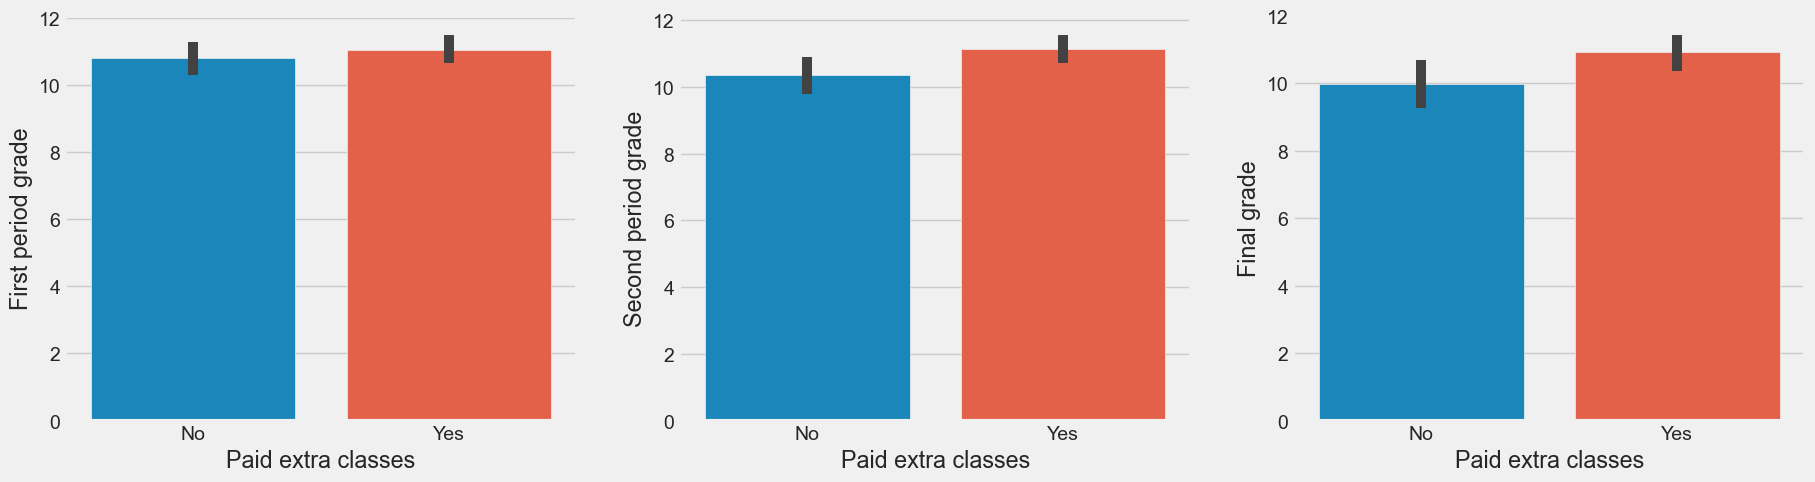

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='paid', y=grade, ax=ax)
    ax.set_xlabel('Paid extra classes')
    ax.set_ylabel(f"{grades_label[grade]}")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'])
plt.show()

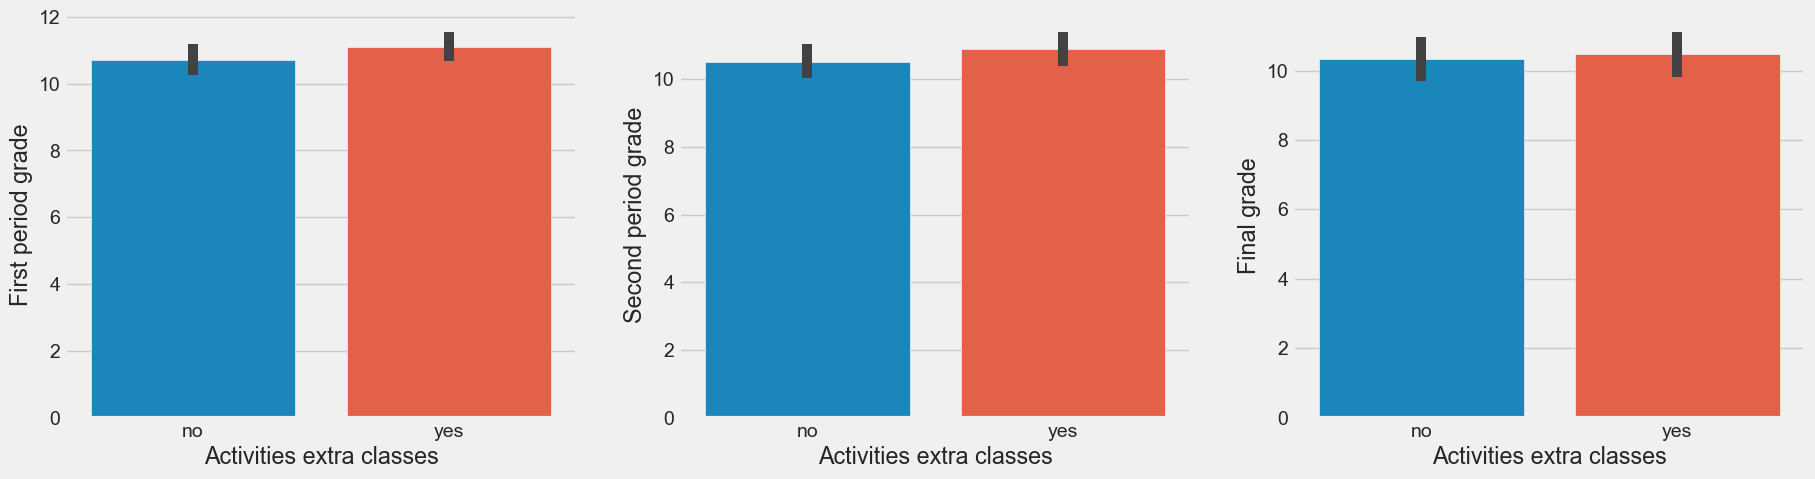

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='activities', y=grade, ax=ax)
    ax.set_xlabel('Activities extra classes')
    ax.set_ylabel(f"{grades_label[grade]}")
plt.show()

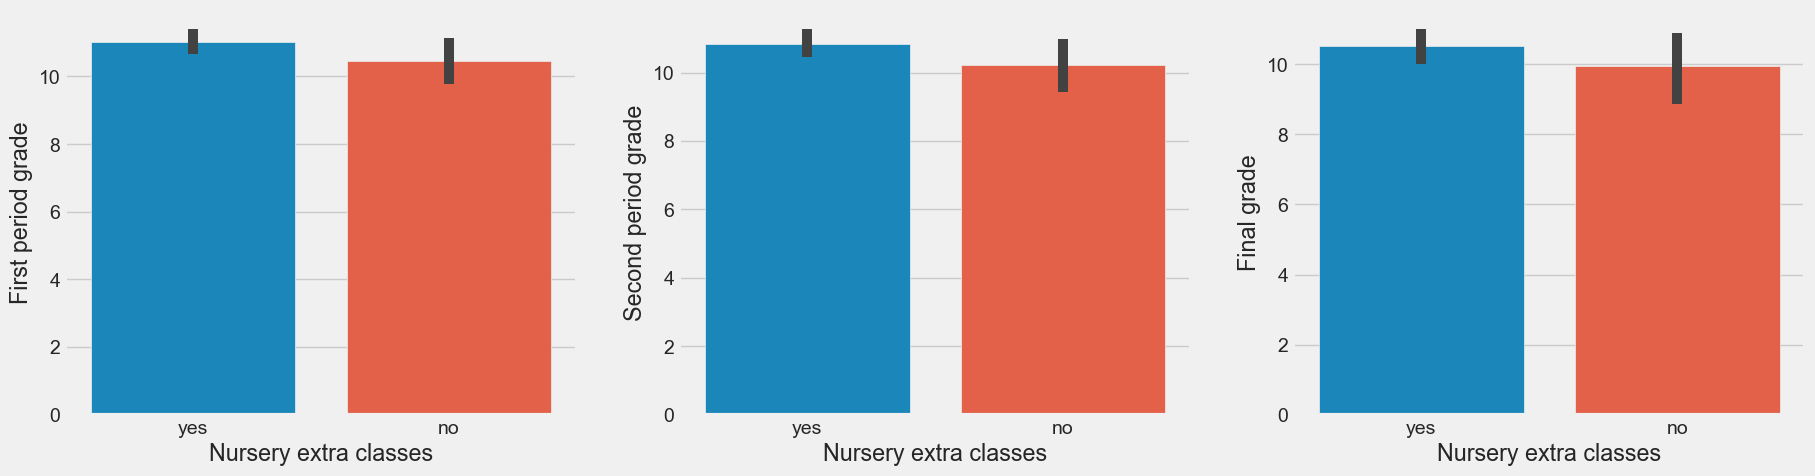

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='nursery', y=grade, ax=ax)
    ax.set_xlabel('Nursery extra classes')
    ax.set_ylabel(f"{grades_label[grade]}")
plt.show()

Một số vấn đề cần chú ý với các biểu đồ trên:
- Hầu như các bạn chi trả cho các lớp học thêm bên ngoài đều có kết quả cao hơn trong tất cả các kì thi.
- Các bạn học sinh xuất phát từ nhà trẻ đều có nền móng tốt hơn trong việc học tập.
- Các hoạt động ngoại khóa cũng không ảnh hưởng nhiều đến kết quả thi cuối kì.

#### Thói quen học tập của học sinh có ảnh hưởng đến kết quả thi cuối kì không?
- Học nâng cao có ảnh hưởng đến kết quả thi cuối kì không?

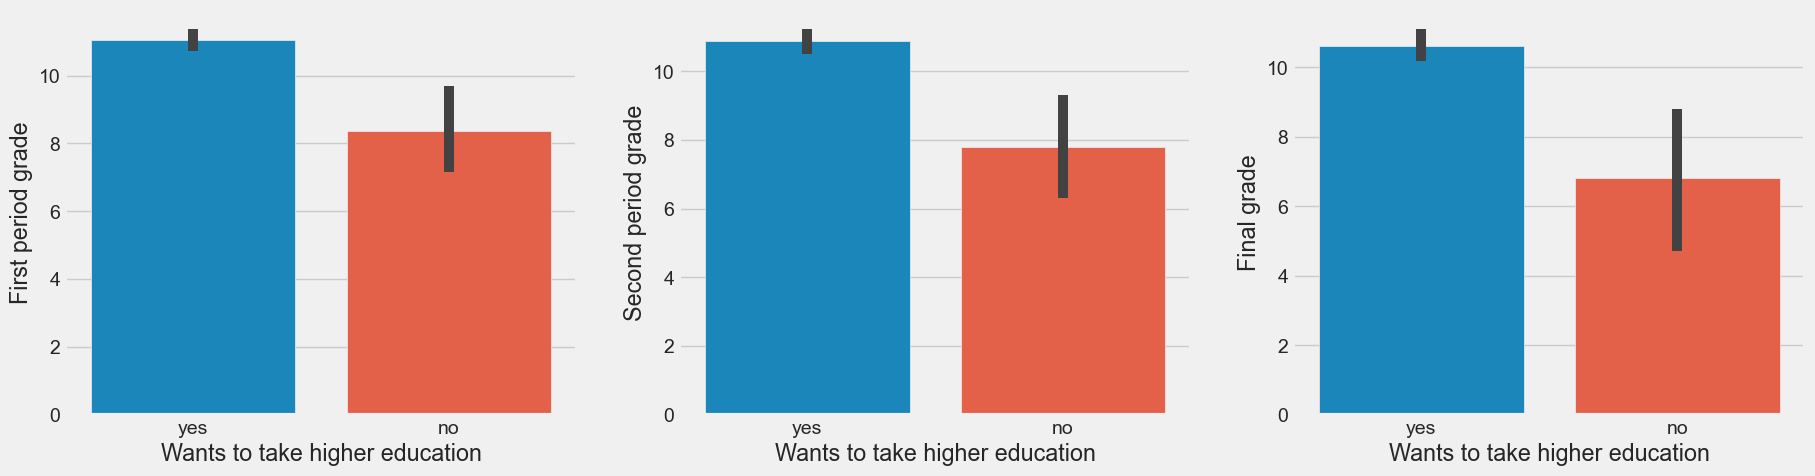

In [65]:
# Distribution of higher with target
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='higher', y=grade, ax=ax)
    ax.set_xlabel('Wants to take higher education')
    ax.set_ylabel(f"{grades_label[grade]}")
plt.show()

- Hầu như các bạn học sinh đều muốn tiếp tục học lên cao hơn. Điều này có thể dễ dàng hiểu được vì các bạn học sinh đều muốn có một tương lai tốt đẹp hơn.
- Ngoài ra, cũng có thể do động lực học tập của các bạn học sinh cũng cao hơn.
- Những sinh viên có mong muốn học cao hơn có thể phát triển thói quen học tập hiệu quả, kỹ năng quản lý thời gian và kỹ thuật tổ chức góp phần mang lại kết quả học tập tốt hơn.


#### Các học sinh có điều kiện truy cập internet có kết quả thi cuối kì tốt hơn không?

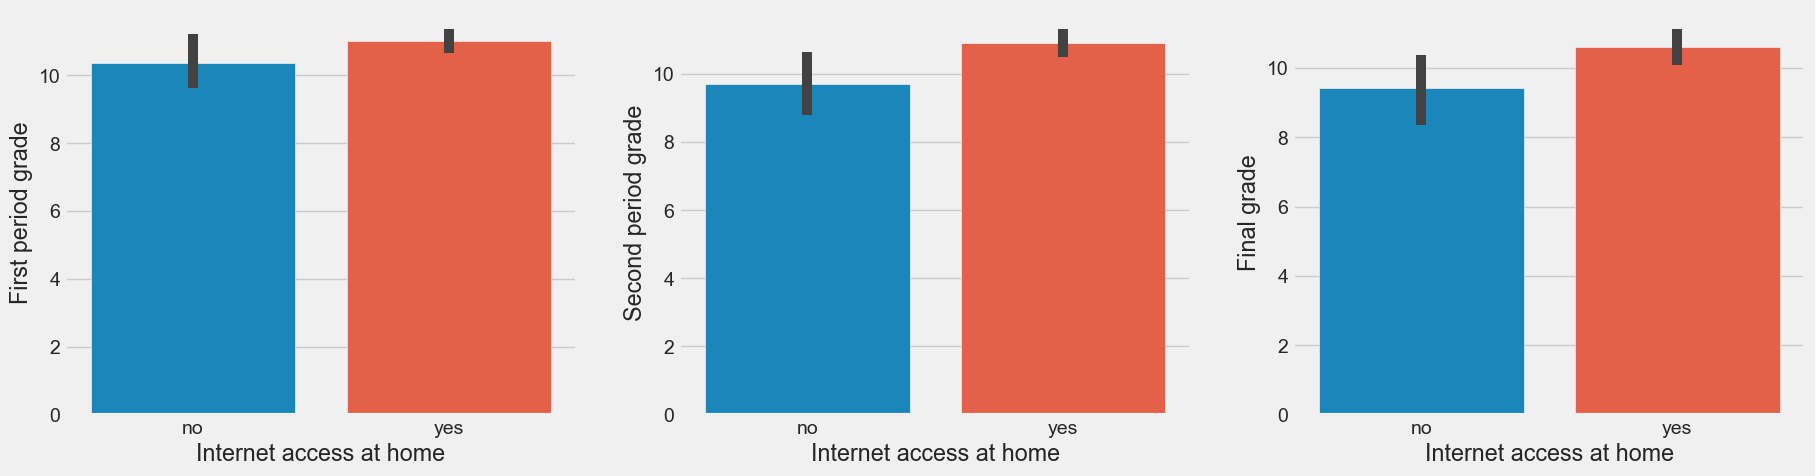

In [66]:
# Distribution of internet with target
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='internet', y=grade, ax=ax)
    ax.set_xlabel('Internet access at home')
    ax.set_ylabel(f"{grades_label[grade]}")
plt.show()

Hầu như các bạn có điều kiện truy cập internet đều có kết quả thi cuối kì tốt hơn so với các bạn không có điều kiện truy cập internet. Một số nguyên nhân có thể là do:
- Các bạn có điều kiện truy cập internet có thể tìm kiếm được nhiều tài liệu học tập hơn.
- Nghiên cứu của các bạn có thể được thực hiện nhanh hơn.
- Thuận lợi trong việc giao tiếp với các bạn bè, giáo viên.

#### Việc tình cảm của các học sinh có ảnh hưởng đến kết quả thi cuối kì không?

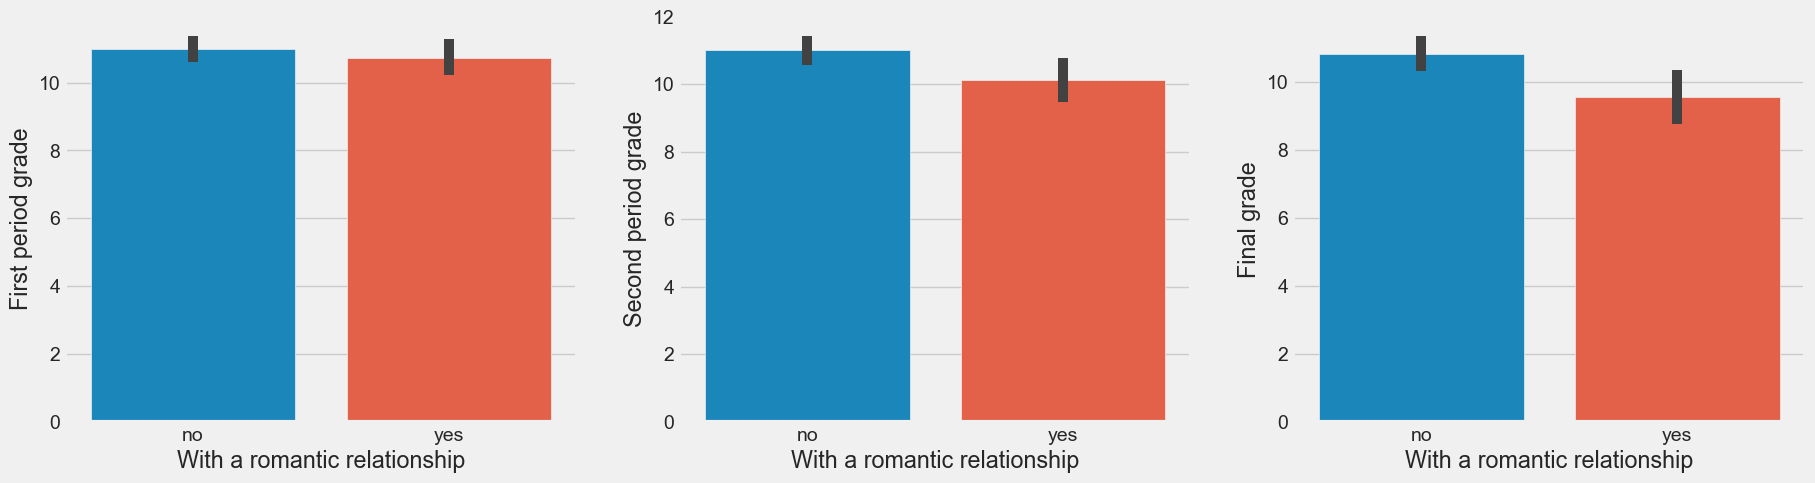

In [67]:
# Distribution of romantic with target
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, grade in enumerate(grades):
    ax = axes[i]
    sns.barplot(data=data, x='romantic', y=grade, ax=ax)
    ax.set_xlabel('With a romantic relationship')
    ax.set_ylabel(f"{grades_label[grade]}")
plt.show()

Các bạn học sinh không có mối quan hệ tình cảm có kết quả thi cuối kì tốt hơn so với các bạn học sinh có mối quan hệ tình cảm. Một số nguyên nhân có thể là do:
- Các bạn học sinh không có mối quan hệ tình cảm có thể tập trung hơn vào việc học tập.
- Có thể sẽ có nhiều thời gian hơn để học tập.